# Построение ML-продукта для оптимизации классификации заявок на оплату

Заказчик: компания [Repetit.ru](https://repetit.ru/)
---
Игорь Жуков, [@Igor_A_Zhukov](https://t.me/Igor_A_Zhukov)

# Описание задачи

- Сервис **Repetit.ru** работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%.
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

**Задача:**

- Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки репетитором. Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет.

**Метрика:**

- Оценка качества модели будет производиться с использованием `precision` и `ROC-AUC`.

**Описание исходных данных**



***Заявки*** (orders.feather)

- `order_date` - дата создания
- `subject_id` - предмет
- `purpose` - цель занятий
- `lesson_price` - цена
- `lesson_duration` - желаемая проодолжительность урока
- `home_metro_id` - ближайшее метро
- `add_info` - доп инфо
- `start_date`
- `working_teacher_id`
- `status_id` - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки) - **целевой признак**
- `comments`   
- `amount_to_pay`
- `planned_lesson_number` - клиент планирует N занятий
- `first_lesson_date` - дата 1 занятия
- `coef` - коэффициент
- `creator_id` - кто создал заявку (id сотрудника или клиента)
- `pupil_category_new_id` - возраст ученика
- `lessons_per_week` - занятий а неделю
- `minimal_price`
- `teacher_sex` - пол репетитора
- `teacher_experience_from` - опыт репетитора от
- `teacher_experience_to`- опыт репетитора до
- `lesson_place_new` - онлайн, у ученика, у учителя
- `pupil_knowledgelvl` -уровень знаний ученика
- `teacher_age_from` - желаемый возраст репеитора от
- `teacher_age_to` - желаемый возраст репеитора от
- `chosen_teachers_only` - не предлагать репетиторов кроме выбранных самостоятельно
- `no_teachers_available` - на заявку нет подходящих репов
- `source_id` - где создана заявка (какая часть сайта, не регион)
- `original_order_id` - дублем какой заявки является эта заявка
- `client_id` - айди клиента
- `additional_status_id` - **похоже как раз отметка, что есть оплата!**
- `max_metro_distance` - максимально готов ехать от метро
- `estimated_fee` - **похоже, расчетная сумма к оплате, когда уже известна, что оплата будет**
- `payment_date`
- `test_group` - аб тесты
- `is_display_to_teachers` - хочет ли клиент получать отклики репетиторов
  
***Репетиторы*** (teacher_info.feather)
- `date_update`
- `reg_date`
- `birth_date`
- `teaching_start_date`
- `user_id` - айди
- `is_email_confirmed`
- `is_home_lessons`
- `is_external_lessons`
- `external_comments`
- `lesson_duration` - продолжит урока
- `lesson_cost` - стоимость урока
- `status_id`
- `status_relevant_date`
- `status_school_id`
- `status_college_id`
- `status_display`
- `russian_level_id`
- `home_country_id`
- `education`
- `information`
- `is_confirmed`
- `is_display` - показывается в каталоге
- `rating_id`
- `rating` - рейтинг
- `comments`
- `rules_confirmed_date`
- `last_visited` - послеждний визит
- `is_pupils_needed` - открыт для заявок
- `is_cell_phone_confirmed`
- `effective_rating` - какой-то еще рейтинг
- `area_id`
- `registrar_id`
- `pupil_needed_date`
- `sex`
- `amount_to_pay` - долг
- `is_remote_lessons`
- `remote_comments`
- `show_on_map`
- `send_mailing`
- `send_suitable_orders`
- `rating_for_users` - рейтинг 2
- `rating_for_admin` - рейтинг 3
- `passport_id`
- `is_edited`
- `orders_allowed` - разрешено назначать на заявки
- `display_days`
- `verification_status_id`
- `is_individual`
- `partner_id`
- `star_rating` - рейтинг 4
- `rating_for_users_yesterday` - рейтинг вчера
- `review_num` - отзывы
- `relevance_date`
- `is_display_at_partners`
- `video_presentation_id` - есть видеопрезентация
- `status_institution_id`
- `Free_time_relevance_date`

**Подходящие по фильтру репетиторы** (suitable_teachers.feather)
- `tteacher_id` - id репетитора
- `order_id` - id заявки
- `contact_result`    
- `enable_auto_assign` - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
- `enable_assign` - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)
    
**Желаемые репетиторы** (prefered_teachers_order_id.feather)
Репетиторы, которых клиент выбрал клиент
- `tteacher_id` - id репетитора
- `order_id` - id заявки


# План действий:
- загрузка данных
- первичный анализ данных
- обработка аномалий и пропусков
- отбор признаков для дальнейшего использования
- создание синтетических признаков и целевого признака
- удаление дубликатов заявок
- разделение выборки на обучающую и тестовую по **хронологическому** принципу - в тесте новые заявки

- изучение дисбаланса
- изучение распределения признаков в зависимости от значения целевого признака
- изучение корреляции
- изучение мультиколлинеарности


- построение пайплайна для линейной модели:
    - борьба с дисбалансом;
    - кодирование признаков;
    - подбор гиперпараметров методом кросс-валидации.


- построение пайплайна для классической ансамблевой модели:
    - борьба с дисбалансом;
    - кодирование признаков;
    - подбор гиперпараметров методом кросс-валидации.
    
- построение пайплайна для ансамблевой модели, использующей метод градиентного бустинга:
    - борьба с дисбалансом;
    - подбор гиперпараметров методом кросс-валидации.

    
- сравнение метрик моделей
- выбор модели
- изучение важности признаков для лучшей модели


- тестирование качества прогнозирования лучшей модели на тестовой выборке
- проверка модели на адекватность на тестовой выборке
- подробный анализ метрик, в т.ч. матрицы ошибок, F-меры, безошибочности, точности и охвата


- отчет и рекомендации

## Загрузим необходимые библиотеки и осуществим настройки вывода

### Установим свежие версии библиотек

### Загрузим библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pyarrow.feather as feather


from sklearn.preprocessing import (OneHotEncoder,
                                   OrdinalEncoder,
                                   StandardScaler,
                                   RobustScaler)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

from sklearn.dummy import DummyClassifier

from sklearn.compose import (make_column_selector,
                             make_column_transformer,
                             ColumnTransformer)


from sklearn.model_selection import (train_test_split,
                                     GridSearchCV, 
                                     TimeSeriesSplit)

from sklearn.metrics import (classification_report,
                             roc_auc_score,
                             f1_score,
                             accuracy_score,
                             roc_curve,
                             confusion_matrix,
                             ConfusionMatrixDisplay)

from imblearn.over_sampling import SMOTE, SMOTENC

from imblearn.pipeline import Pipeline, make_pipeline

from catboost import CatBoostClassifier

from optuna.integration import OptunaSearchCV
from optuna.distributions import (FloatDistribution,
                                  IntDistribution,
                                  CategoricalDistribution)


import re
import os
import phik
import joblib

### Настроим вывод данных на экран

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

### Определим значения констант

In [3]:
RANDOM_STATE = 53

## Загрузим и изучим данные

### Объявим функцию загрузки
с проверкой загрузки, заданием индекса и приведением наименований столбцов к общепринятому виду

In [4]:
def loader(path):
    loaded_data=[]
    if os.path.exists(path):
        loaded_data = pd.read_feather(path)#, index_col=[0])
        print('Загружен файл: ', path)
        loaded_data.columns = [re.sub(r'(?<!^)(?=[A-Z])',
                '_', i).lower() for i in loaded_data.columns]
    else:
        print('Проверьте путь')

    return loaded_data

#### Загрузим данные

In [5]:
path1 = 'orders.feather'
path2 = 'prefered_teachers_order_id.feather'
path3 = 'suitable_teachers.feather'
path4 = 'teachers_info.feather'

In [6]:
data = loader(path1)
prefered_teachers = loader(path2)
suitable_teachers = loader(path3)
teachers_info = loader(path4)

Загружен файл:  orders.feather
Загружен файл:  prefered_teachers_order_id.feather
Загружен файл:  suitable_teachers.feather
Загружен файл:  teachers_info.feather


### Объявим функцию description для первичного исследования данных

In [7]:
def description(data):

    print('\033[1m \nОбщая информация: \n\033[0m \n')
    data.info()
    display(data.head(2))

    print('\n\033[1m Количество дубликатов: \033[0m', data.duplicated().sum())
    print('\033[1m Пропущенных значений: \033[0m', data.isna().sum().sum())
    print('\033[1m Уникальных индексов: \033[0m', data.index.nunique())
    print('\n\033[1m  Статистические характеристики датасета: \033[0m')

    display(data.describe(include = 'all').T)

    print('\033[1m \nИзучим 5 минимальных и 5 максимальных значений каждого столбца: \033[0m \n')
    for column in data.columns:
        try:
            print(column)
            print(sorted(data[data[column].notna()][column].unique())[0:5], '.....',
                  sorted(data[data[column].notna()][column].unique())[-5:-1],
                  sorted(data[data[column].notna()][column].unique())[-1], '\n')
        except:
            print('столбец', column, 'не может быть показан')


## Изучим имеющиеся данные

### Изучим датасет `data`

In [8]:
description(data)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.0,None,0,60,None,NaN,None,None,NaN,16,None,NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.0,675960,7.0,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.0,None,0,60,None,NaN,None,None,NaN,7,"\n01.11.2022 11:46 - ""Заявка прикреплена к заявке № 2294000"" (Алешина Марина)",NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.0,675960,7.0,NaN,None,None,1



 Количество дубликатов:  900
 Пропущенных значений:  10320506
 Уникальных индексов:  437217

  Статистические характеристики датасета: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1191861.0,NaN,NaN,NaN,2340488.448691,344556.254559,1742636.0,2041441.0,2341556.0,2638720.0,3605505.0
order_date,1191861,1190749,2021-09-16 03:58:15.883,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subject_id,1181529.0,NaN,NaN,NaN,21.371887,6157.319336,1.0,3.0,8.0,13.0,3605505.0
purpose,1025351,294447,Разделы: школьный курс.\nДополнения: ОГЭ (ГИА).\nКатегория ученика: школьник 9 класса.\nЦель занятий: подготовка к ОГЭ.,11450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lesson_price,1191861.0,NaN,NaN,NaN,2019.465871,916334.053364,0.0,500.0,1000.0,1500.0,1000000000.0
lesson_duration,1191861.0,NaN,NaN,NaN,71.867543,6130.493786,0.0,60.0,60.0,60.0,3605505.0
lesson_place,31,4,у ученика,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_metro_id,642447.0,NaN,NaN,NaN,813.00592,8362.9375,1.0,228.0,644.0,1146.0,3605505.0
add_info,1044688,609437,Количество занятий в неделю: 1-2.\nВозраст репетитора: не важно.\nПол репетитора: Не важно.\n,7234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_date,705578,705033,2023-01-07 20:00:43.073,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

id
[1742636, 1742637, 1742638, 1742639, 1742640] ..... [2936684, 2936685, 3211265, 3342337] 3605505 

order_date
['0029-07-18 05:28:02.684', '0042-01-12 04:26:08.039', '0042-01-12 05:09:05.007', '2021-09-01 00:12:16.713', '2021-09-01 00:16:46.867'] ..... ['2023-11-05 23:58:07.547', '2023-11-05 23:58:26.597', '2023-11-05 23:58:31.963', '2023-11-05 23:59:09.900'] 2023-11-05 23:59:45.687 

subject_id
[1.0, 2.0, 3.0, 4.0, 5.0] ..... [33.0, 36.0, 3211265.0, 3342337.0] 3605505.0 

purpose
['\n\n\u200bКатегория ученика : Взрослый\u200a', '\n\n\u200bКатегория ученика : Взрослый\u200a\n\u200bРазделы : инвестиции\u200a', '\n\n\u200bКатегория ученика : школьники 6 класса\u200a', '\n\n\u200bКатегория ученика : школьники 9 класса\u200a', '\nМесто проведения занятий: у ученика (улица Ясеневая, 31 корпус 2). В перспективе возможны занятия удалённо. \nПредполагаемое число занятий два раза в неделю в выходные в любое время, будни дни 

[-110, -65, -60, -50, -10] ..... [25000, 99999, 3211265, 3342337] 3605505 

chosen_teachers_only
[0, 1] ..... [0] 1 

no_teachers_available
[0, 1] ..... [0] 1 

source_id
[0, 2, 3, 4, 5] ..... [25, 26, 3211265, 3342337] 3605505 

original_order_id
[263.0, 19367.0, 113952.0, 134851.0, 138178.0] ..... [2937205.0, 2938030.0, 3211265.0, 3342337.0] 3605505.0 

client_id
[1, 2021, 72451, 115368, 155290] ..... [1268631, 1268632, 3211265, 3342337] 3605505 

additional_status_id
[1.0, 2.0, 3.0, 4.0, 5.0] ..... [24.0, 25.0, 3211265.0, 3342337.0] 3605505.0 

max_metro_distance
[0.0, 1.0, 2.0, 3.0, 5.0] ..... [3000.0, 3211265.0, 3342337.0, 3605505.0] 5000000.0 

estimated_fee
['0', '100', '1000', '10000', '1005'] ..... ['995', '997,5', '9975', '999'] 9998 

payment_date
['0029-07-18 05:28:02.684', '0042-01-12 04:26:08.039', '0042-01-12 05:09:05.007', '2020-11-07 20:29:48.167', '2020-11-14 19:22:48.530'] ..... ['2023-11-07 20:28:42.993', '2023-11-07 20:32:39.500', '2023-11-07 20:33:25.767', '2023-1

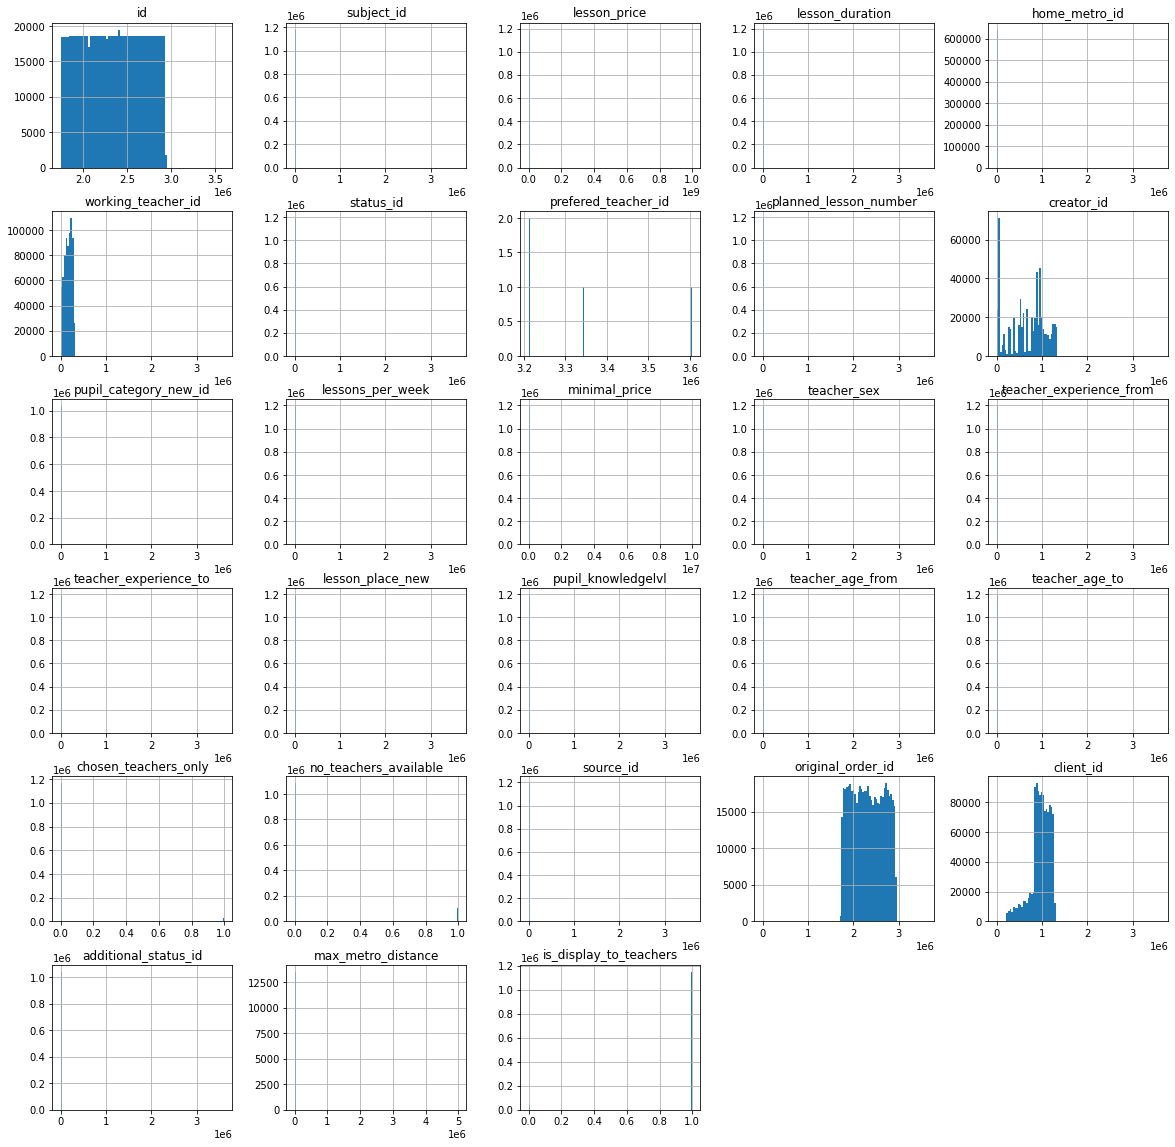

In [9]:
data.hist(figsize = (20, 20), bins = 100);

#### Проверим дубликаты в идентификаторах заявок

In [10]:
data.drop_duplicates()['id'].duplicated().sum()

0

#### В столбцах с датами имеется три нестандартных значения даты, изучим строки с этими значениями

In [11]:
data[(data['order_date'] == '0029-07-18 05:28:02.684') |
        (data['order_date'] == '0042-01-12 04:26:08.039') |
        (data['order_date'] == '0042-01-12 05:09:05.007')]

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
105390,3211265,0042-01-12 05:09:05.007,3211265.0,None,3211265,3211265,None,3211265.0,None,0042-01-12 05:09:05.007,3211265.0,3211265,None,3211265.0,"8,344264636103745E-308",3211265,0042-01-12 05:09:05.007,3211265.0,3211265.0,3211265,3211265,3211265,3211265,3211265,3211265,3211265,3211265,3211265,1,1,3211265,3211265.0,3211265,3211265.0,3211265.0,"8,344264636103745E-308",0042-01-12 05:09:05.007,1
109392,3342337,0042-01-12 04:26:08.039,3342337.0,None,3342337,3342337,None,3342337.0,None,0042-01-12 04:26:08.039,3342337.0,3342337,None,3342337.0,"8,344239172283769E-308",3342337,0042-01-12 04:26:08.039,3342337.0,3342337.0,3342337,3342337,3342337,3342337,3342337,3342337,3342337,3342337,3342337,1,1,3342337,3342337.0,3342337,3342337.0,3342337.0,"8,344239172283769E-308",0042-01-12 04:26:08.039,1
79972,3211265,0042-01-12 05:09:05.007,3211265.0,None,3211265,3211265,None,3211265.0,None,0042-01-12 05:09:05.007,3211265.0,3211265,None,3211265.0,"8,344264636103745E-308",3211265,0042-01-12 05:09:05.007,3211265.0,3211265.0,3211265,3211265,3211265,3211265,3211265,3211265,3211265,3211265,3211265,1,1,3211265,3211265.0,3211265,3211265.0,3211265.0,"8,344264636103745E-308",0042-01-12 05:09:05.007,1
437216,3605505,0029-07-18 05:28:02.684,3605505.0,None,3605505,3605505,None,3605505.0,None,0029-07-18 05:28:02.684,3605505.0,3605505,None,3605505.0,"4,450342944189884E-308",3605505,0029-07-18 05:28:02.684,3605505.0,3605505.0,3605505,3605505,3605505,3605505,3605505,3605505,3605505,3605505,3605505,1,1,3605505,3605505.0,3605505,3605505.0,3605505.0,"4,450342944189884E-308",0029-07-18 05:28:02.684,1


#### Выводы по результатам предварительного изучения данных датасета `data`, содержащего информацию о заявках на обучение

- в датасете **1 191 861** строк, **38** столбцов
- уникальных индексов всего **437 217**, а строк **1 191 861**, требуется изучение и обработка
- огромное количество **пропусков данных**, требуется обработка
- **900** полных **дубликатов**, **удалим** их
- в **идентификаторах заявок** дубликаты отсутствуют, все заявки **уникальны**
- столбцы `order_date`, `start_date`, `first_lesson_date`, `payment_date` имеют тип `object`, нужно привести к типу `datetime`
- столбцы `max_metro_distance`, `lesson_price` и `minimal_price` содержат невозможные максимальные значения, требуется изучение и обработка
- столбцы `teacher_age_from` `teacher_age_to` содержат **невозможные минимальные и максимальные значения**
- имеется **4** строки с неверными значениями дат, в остальных столбцах этих строк находятся значения `3211265`, `3342337` и `3605505`, **удалим** их
- строки с неверными значениями даты содержат неверные значения и в других признаках, **удалим их**
- в признаках `max_metro_distance`, `lesson_place`, `prefered_teacher_id` слишком мало значений, **удалим** их
- столбец `original_order_id` содержит **невозможные** значения, например `263.0`, нужно изучить и обработать
- столбец `estimated_fee` имеет пропуски данных и из-за этого неверный тип `object` вместо `int64`
- столбец `teacher_sex` содержит 7 уникальных значений вместо двух
- столбцы `max_metro_distance`, `subject_id`, `home_metro_id`, `additional_status_id`, `original_order_id`, `creator_id`, `pupil_category_new_id`, `prefered_teacher_id`, `working_teacher_id` имеют неверный тип `float32`, видимо из-за пропущеных данных


- признаки `lesson_price`, `lesson_duration`, `amount_to_pay`, `planned_lesson_number`, `lessons_per_week`,`minimal_price`, `teacher_experience_from`, `teacher_experience_to`, `teacher_age_from`, `teacher_age_to`, `max_metro_distance`, `order_date`, `start_date`, `first_lesson_date`, `payment_date` - **количественные**, остальные **категориальные**


##### Выводы по результатам анализа сущности признаков

- столбец `status_id` содержит информацию для создания **целевого признака**
- столбцы `additional_status_id`, `amount_to_pay`, `client_id`, `estimated_fee`, `first_lesson_date`, `payment_date`, `start_date`, `working_teacher_id`, `comments` содержат информацию, которая дает **утечку** целевого признака, требуется их **удалить** до обучения модели
- признаки `id`, `creator_id`, `working_teacher_id`, `original_order_id`, `prefered_teacher_id` можно **использовать для соединения** с другими таблицами и создания синтетических признаков, а потом **удалить**
- признаки `purpose` и `add_info` содержат текстовые комментарии, нужно изучить на предмет создания **синтетических** признаков за счет текстового анализа

- значение `0` не используется в числовых категориальных переменных: можно **заполнить** пропуски значением `0`
- пропуски в текстовых переменных можно **заполнить** значением `unknown`

### Выделим из датасета `data` тестовый датасет по `хронологическому` принципу до обработки данных и создания признаков для чистоты эксперимента. Модель увидит тестовые данные в первый раз и в необработанном виде

#### Отсортируем датасет по возрастанию номера заявки `id`, так как по информации от заказчика номера присваиваются в `хронологическом` порядке

In [12]:
data = data.sort_values(by = 'id', ascending = True).reset_index(drop = True)

In [13]:
data.tail(2)

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
1191859,3342337,0042-01-12 04:26:08.039,3342337.0,None,3342337,3342337,None,3342337.0,None,0042-01-12 04:26:08.039,3342337.0,3342337,None,3342337.0,"8,344239172283769E-308",3342337,0042-01-12 04:26:08.039,3342337.0,3342337.0,3342337,3342337,3342337,3342337,3342337,3342337,3342337,3342337,3342337,1,1,3342337,3342337.0,3342337,3342337.0,3342337.0,"8,344239172283769E-308",0042-01-12 04:26:08.039,1
1191860,3605505,0029-07-18 05:28:02.684,3605505.0,None,3605505,3605505,None,3605505.0,None,0029-07-18 05:28:02.684,3605505.0,3605505,None,3605505.0,"4,450342944189884E-308",3605505,0029-07-18 05:28:02.684,3605505.0,3605505.0,3605505,3605505,3605505,3605505,3605505,3605505,3605505,3605505,3605505,1,1,3605505,3605505.0,3605505,3605505.0,3605505.0,"4,450342944189884E-308",0029-07-18 05:28:02.684,1


#### Определим подходящую заявку для  выделения 25% выборки для тестовой выборки (самые новые заявки) - заявка должна быть первичная


In [14]:
split_index = int(round(len(data)*0.75, 0))
split_index

893896

In [15]:
round(len(data[split_index: -1])/len(data), 2)

0.25

In [16]:
data.loc[split_index, 'original_order_id']

nan

- в столбце `original_order_id` пропуск, значит заявка `первичная`, можно сделать разделение по этому индексу

In [17]:
test_data = data[split_index: -1]

In [18]:
test_data['id'].head(1)

893896    2638721
Name: id, dtype: int32

In [19]:
train_data = data[0: split_index]
train_data['id'].tail(1)

893895    2638720
Name: id, dtype: int32

In [20]:
print(round(len(train_data)/(len(train_data)+len(test_data)), 2))

0.75


- датасет `data` разделен на **обучающую** и **тестовую** выборки в пропорции 75%/25% в `хронологическом` порядке - все заявки тестовой выборке **новее** заявок обучающей

### Обработаем датасет `data`

##### Объявим функцию для предобработки датасета, которая выполнит следующие действия:
- удалит лишние столбцы
- удалит дубликаты
- восстановит индекс
- приведет столбец с датами к формату `datetime`
- заполнит пропуски данных
- приведет столбцы с целочисленными значениями к типу `Int64`
- ограничит максимальную стоимость урока и всех уроков суммой 10000 руб.
- приведет возраст учителей в диапазон от 16 до 90 лет

In [21]:
def preprocessing(data):


    ##### Удалим дубликаты и восстановим индекс

    data = data.drop_duplicates().reset_index(drop = True)

    ##### Удалим лишние столбцы

    col_to_keep = [
     'add_info', # сделаем признаки
     #'additional_status_id', - утечка целевого признака
     #'amount_to_pay', - утечка целевого признака
     'chosen_teachers_only',
     #'client_id', #- утечка целевого признака
     #'comments', #- утечка целевого признака
     #'creator_id', #- утечка целевого признака,
     #'estimated_fee', - - утечка целевого признака
     #'first_lesson_date', - утечка целевого признака
     'home_metro_id',
     'id', # - пока нужен для слияния
     'is_display_to_teachers',
     'lesson_duration',
     #'lesson_place', - пустой
     'lesson_place_new',
     'lesson_price',
     'lessons_per_week',
     #'max_metro_distance', - слишком мало значений
     'minimal_price',
     'no_teachers_available',
     'order_date',
     'original_order_id', # пока нужен для слияния
     # 'payment_date', - утечка целевого признака
     'planned_lesson_number',
     #'prefered_teacher_id', - пустой
     'pupil_category_new_id',
     'pupil_knowledgelvl',
     'purpose', # сделаем признаки
     'source_id',
     #'start_date', - утечка целевого признака
     'status_id', # - целевой признак равен значениям 5,6,13,15 !!!, потом удалим
     'subject_id',
     'teacher_age_from',
     'teacher_age_to',
     'teacher_experience_from',
     'teacher_experience_to',
     'teacher_sex',
     'working_teacher_id' #- утечка целевого признака, но нужен для создания рейтинга учителей, потом удалим
    ]
    data = data[col_to_keep]

    # Удалим строки с неверными данными

    data = data[(data['order_date'] != '0029-07-18 05:28:02.684') &
                (data['order_date'] != '0042-01-12 04:26:08.039') &
                (data['order_date'] != '0042-01-12 05:09:05.007')]
    
     #### Приведем столбцы с датами к типу `datetime`

    data['order_date'] = pd.to_datetime(data['order_date'],
                                        format='%Y-%m-%d %H:%M:%S.%f').dt.round('1 min')

    #### Заполним пропуски данных
        
    data[['add_info','purpose']] = data[['add_info','purpose']].fillna('unknown')
    data = data.fillna(0)

    #### Приведем столбцы с ошибочным типом `float64` к типу `int64`,
    # поскольку у нас все числа в датасете целые

    for column in data.columns:
        if data[column].dtype == 'float32':
            data[column]= data[column].astype('int64')

    # Ограничим стоимость уроков
    data.loc[data['lesson_price'] > 10000, 'lesson_price'] = 10000
    data.loc[data['minimal_price'] > 10000, 'minimal_price'] = 10000


    # Ограничим возраст учителей диапазоном 16 - 90 лет и уберем отрицательные значения
    data.loc[data['teacher_age_from'] < 0,
         'teacher_age_from'] = abs(data.loc[data['teacher_age_from'] < 0,
                                            'teacher_age_from'])

    data.loc[data['teacher_age_from'] < 16, 'teacher_age_from'] = 16
    data.loc[data['teacher_age_from'] > 90, 'teacher_age_from'] = 90

    data.loc[data['teacher_age_to'] < 0,
         'teacher_age_to'] = abs(data.loc[data['teacher_age_to'] < 0,
                                          'teacher_age_to'])

    data.loc[data['teacher_age_to'] < 16, 'teacher_age_to'] = 16
    data.loc[data['teacher_age_to'] > 90, 'teacher_age_to'] = 90

     # Удалим строки, в которых дубликат имеет номер основной заявки,
    #так как это ошибка по информации от заказчика
    data = data[data['id'] != data['original_order_id']]

    # Заполним нулевые (пропущенные) значения столбца `original_order_id` значениями столбца `id`
    data.loc[data['original_order_id'] == 0,
             'original_order_id'] = data.loc[data['original_order_id'] == 0, 'id']
       
    # Создадим из столбца `status_id` столбец целевого признака `payment`,
    # где 1 означает факт оплаты, а ноль - ее отсутствие
    
    payment_markers = [5, 6, 13, 15]
    data.loc[:,'payment'] = 0
    data.loc[data['status_id'].isin(payment_markers),'payment'] = 1
    data = data.drop('status_id', axis = 1)



    return data

##### Обработаем датасет `data`

In [22]:
train_data = preprocessing(train_data)

In [23]:
train_data.tail(2)

,add_info,chosen_teachers_only,home_metro_id,id,is_display_to_teachers,lesson_duration,lesson_place_new,lesson_price,lessons_per_week,minimal_price,no_teachers_available,order_date,original_order_id,planned_lesson_number,pupil_category_new_id,pupil_knowledgelvl,purpose,source_id,subject_id,teacher_age_from,teacher_age_to,teacher_experience_from,teacher_experience_to,teacher_sex,working_teacher_id,payment
892995,Желаемое время для занятий: понедельник - 13.\nКоличество занятий в неделю: 1-2.\nВозраст репетитора: не важно.\nПол репетитора: Женский.\n,0,0,2638719,1,60,4,500,3,0,0,2023-06-16 13:49:00,2638711,10,14,2,Цели: преодолеть языковой барьер.\nДополнения: DELF.\nКатегория ученика: Студенты.\nУровень знаний: начальный.\nУровень экзамена: B1.\nДо экзамена осталось: Год и больше.\nКурс студента: 2.\n,23,4,16,16,0,0,2,0,0
892996,"Район: Новая деревня село.\nМесто проведения занятий: у преподавателя (Новая деревня село).\nПредполагаемое число занятий в неделю: 1-2, понедельник - 15; вторник - 15; среда - 15; четверг - 15; пятница - 15..\nОпыт репетитора: не имеет значения.\nВозраст репетитора: не имеет значения.\nПол репетитора: не имеет значения.\nСтатус репетитора: не имеет значения.",0,2178,2638720,1,60,2,500,3,0,1,2023-06-16 13:50:00,2638720,10,10,0,Разделы: черчение.\nКатегория ученика: школьник 9 класса.\nЦель занятий: помощь по предмету.,23,21,16,16,0,0,3,0,0


В основном датасете `data`, содержащем информацию о заявках:
- исправлен `индекс`
- **удалены** столбцы с данными, ведущими к утечке целевого признака
-  **удалены** строки с ошибочными данными
- формат столбца с датами **приведены** к `datetime`
- значения возраста **приведены** к диапазону от 16 до 90 лет
- числовые данные **приведены** к `целочисленному` типу
- **cоздан** столбец с **целевым** признаком `payment`, в котором 1 означает, что оплата произведена, и **удален** столбец `status_id`, из которого был сформирован целевой признак

### Изучим датасет `suitable_teachers`

In [24]:
description(suitable_teachers)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271186 entries, 0 to 20271185
Data columns (total 5 columns):
 #   Column              Dtype   
---  ------              -----   
 0   teacher_id          int32   
 1   order_id            int32   
 2   contact_result      category
 3   enable_auto_assign  int8    
 4   enable_assign       int8    
dtypes: category(1), int32(2), int8(2)
memory usage: 232.3 MB


,teacher_id,order_id,contact_result,enable_auto_assign,enable_assign
0,82583,1742711,Репетитор согласился,1,1
1,125057,1742713,"Репетитор положил трубку, либо обрыв связи (Oktell)",0,0



 Количество дубликатов:  49
 Пропущенных значений:  12824362
 Уникальных индексов:  20271186

  Статистические характеристики датасета: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
teacher_id,20271186.0,NaN,NaN,NaN,157810.805305,80246.764911,33.0,95420.0,159595.0,224173.0,312661.0
order_id,20271186.0,NaN,NaN,NaN,2500198.295852,333894.032159,1742638.0,2265722.0,2571756.0,2779002.0,2946699.0
contact_result,7446824,10866,.,1846839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enable_auto_assign,20271186.0,NaN,NaN,NaN,0.129108,0.33532,0.0,0.0,0.0,0.0,1.0
enable_assign,20271186.0,NaN,NaN,NaN,0.027548,0.163674,0.0,0.0,0.0,0.0,1.0


 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

teacher_id
[33, 51, 52, 86, 87] ..... [312587, 312609, 312613, 312623] 312661 

order_id
[1742638, 1742639, 1742650, 1742651, 1742654] ..... [2946695, 2946696, 2946697, 2946698] 2946699 

contact_result
['\nРепетитор оставил запрос : ', '\nРепетитор оставил запрос : \nРепетитор оставил запрос : \nРепетитор оставил запрос : Прошу уменьшить коэффициент', '\nРепетитор оставил запрос : Договорились о занятиях, но еще не определились со временем.Завтра сообщу о начале занятий. Спасибо.', '\nРепетитор оставил запрос : О занятии договорились на 8 октября с оплатой 1000 рублей за час.\r\n', '!'] ..... ['ёё', '№', '№1 анкета понравилась, кл пока не хочет контакты', '№2 анкета не понравилась'] №3 анкета отправлена,  кл еще не смотрела 

enable_auto_assign
[0, 1] ..... [0] 1 

enable_assign
[0, 1] ..... [0] 1 



In [25]:
suitable_teachers[suitable_teachers['order_id'].duplicated()].head(5)

,teacher_id,order_id,contact_result,enable_auto_assign,enable_assign
2,231211,1742713,"Репетитор положил трубку, либо обрыв связи (Oktell)",0,0
3,128773,1742713,"Репетитор положил трубку, либо обрыв связи (Oktell)",0,0
4,63019,1742713,Репетитор согласился,0,1
6,155227,1742714,",",0,0
7,5244,1742714,",",0,0


In [26]:
suitable_teachers[suitable_teachers['enable_auto_assign'] == 1].head(3)

,teacher_id,order_id,contact_result,enable_auto_assign,enable_assign
0,82583,1742711,Репетитор согласился,1,1
46,101198,1742740,NaN,1,0
48,61399,1742740,NaN,1,0


In [27]:
suitable_teachers[suitable_teachers['enable_assign'] == 1].duplicated().sum()

0

- в датасете `suitable_teachers` **20 271 186** записей
- **49** полных дубликатов
- имеются пропуски данных в столбце `contact_result`, где описываются результаты переговоров сотрудников сервиса с репетитором
- в датасете присутствуют дубликаты в столбце `order_id`, так как одна заявка направляется нескольким подходящим репетиторам
- столбец `contact_result` не известен на момент создания заявки и не может быть использован, **удалим** его

#### Удалим ненужный столбец и полные дубликаты после удаления столбца с комментариями

In [28]:
suitable_teachers = suitable_teachers.drop('contact_result', axis = 1)

In [29]:
print('Полных дубликатов было:', suitable_teachers.duplicated().sum())
suitable_teachers = suitable_teachers.drop_duplicates().reset_index(drop = True)
print('Полных дубликатов осталось:', suitable_teachers.duplicated().sum())
suitable_teachers.info()

Полных дубликатов было: 141
Полных дубликатов осталось: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271045 entries, 0 to 20271044
Data columns (total 4 columns):
 #   Column              Dtype
---  ------              -----
 0   teacher_id          int32
 1   order_id            int32
 2   enable_auto_assign  int8 
 3   enable_assign       int8 
dtypes: int32(2), int8(2)
memory usage: 193.3 MB


- из датасета `suitable_teachers` **удалены** столбец `contact_result` и полные дубликаты

### Изучим датасет `prefered_teachers`

In [30]:
description(prefered_teachers)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135198 entries, 0 to 1135197
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype
---  ------      --------------    -----
 0   order_id    1135198 non-null  int32
 1   teacher_id  1135198 non-null  int32
dtypes: int32(2)
memory usage: 8.7 MB


,order_id,teacher_id
0,2469225,19663
1,2470455,19663



 Количество дубликатов:  16
 Пропущенных значений:  0
 Уникальных индексов:  1135198

  Статистические характеристики датасета: 


,count,mean,std,min,25%,50%,75%,max
order_id,1135198.0,2.267043e+06,331442.681054,1742638.0,1984395.0,2246181.0,2511700.0,2946594.0
teacher_id,1135198.0,1.435985e+05,73975.348794,33.0,86423.0,144398.0,204321.0,312232.0


 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

order_id
[1742638, 1742639, 1742640, 1742641, 1742642] ..... [2946580, 2946585, 2946587, 2946593] 2946594 

teacher_id
[33, 51, 52, 86, 87] ..... [312015, 312065, 312193, 312215] 312232 



In [31]:
teachers_in_orders = pd.pivot_table(prefered_teachers, index = 'order_id',
                                    values = 'teacher_id', aggfunc = 'count')
teachers_in_orders.columns = ['prefered_teachers']
teachers_in_orders.sort_values(by = 'prefered_teachers', ascending = False).head()

,prefered_teachers
order_id,
2667992,455
2039963,445
2039667,445
2626967,297
2626971,297


- в датасете `prefered_teachers` **1 135 198** записей
- **16** полных дубликатов, **удалим их**
- пропуски данных **отсутствуют**
- некорректных значений **не выявлено**
- некорректных форматов **не выявлено**
- на одну заявку может приходится до 455 предпочитаемых репетиторов

- датасет на первый взгляд представляется **бесполезным** для прогнозирования оплаты заявок

#### Удалим дубликаты

In [32]:
prefered_teachers = prefered_teachers.drop_duplicates()

In [33]:
prefered_teachers.duplicated().sum()

0

- удалены полные дубликаты из датасета `prefered_teachers`

### Изучим датасет `teachers_info`

In [34]:
description(teachers_info)

 
Общая информация: 
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          307972 non-null  int32   
 1   date_update                 307972 non-null  category
 2   reg_date                    307972 non-null  category
 3   birth_date                  307972 non-null  category
 4   teaching_start_date         307972 non-null  category
 5   user_id                     307972 non-null  int32   
 6   is_email_confirmed          307972 non-null  int8    
 7   is_home_lessons             307972 non-null  int8    
 8   is_external_lessons         307972 non-null  int8    
 9   external_comments           90978 non-null   category
 10  lesson_duration             307972 non-null  int16   
 11  lesson_cost                 307972 non-null  int32   
 12  status_id                   307972

,id,date_update,reg_date,birth_date,teaching_start_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,external_comments,lesson_duration,lesson_cost,status_id,status_relevant_date,status_school_id,status_college_id,status_display,russian_level_id,home_country_id,information,is_confirmed,external_comments.1,lesson_duration.1,lesson_cost.1,status_id.1,status_relevant_date.1,status_school_id.1,status_college_id.1,status_display.1,russian_level_id.1,home_country_id.1,information.1,is_confirmed.1,external_comments.2,lesson_duration.2,lesson_cost.2,status_id.2,status_relevant_date.2,status_school_id.2,status_college_id.2,status_display.2,russian_level_id.2,home_country_id.2,photo_path,information.2,is_confirmed.2,is_display,rating_id,rating,comments,rules_confirmed_date,last_visited,is_pupils_needed,is_cell_phone_confirmed,effective_rating,area_id,pupil_needed_date,sex,amount_to_pay,is_remote_lessons,remote_comments,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,passport_id,is_edited,orders_allowed,display_days,verification_status_id,is_individual,partner_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners,status_institution_id,free_time_relevance_date
0,33,2023-11-07 14:20:28.323,2007-12-24 19:26:46.000,1983-06-05 00:00:00.000,1989-09-01 00:00:00.000,45,0,0,0,NaN,60,1000,4,NaN,NaN,NaN,0,5,7,"[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p]&nbsp;[/p][p]родордророрлуот&nbsp;[/p][p]&nbsp;[/p]",1,NaN,60,1000,4,NaN,NaN,NaN,0,5,7,"[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p]&nbsp;[/p][p]родордророрлуот&nbsp;[/p][p]&nbsp;[/p]",1,NaN,60,1000,4,NaN,NaN,NaN,0,5,7,/teachers/33/photo/photo_small.jpg,"[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Как узнать сколько знаков написал, чтобы выйти на максимальный рейтинг по данному разделу? Нет счетчика количества знаков...[/p][p]&nbsp;[/p][p]родордророрлуот&nbsp;[/p][p]&nbsp;[/p]",1,1,15,5,Швачко М.Н. 15.01.2018 14:59 - 33\r\nАникеева А.В. 03.04.2019 12:12 - тест\r\nНейман В.Л. 10.02.2023 17:11 - Тестовый коммент\r\nНейман В.Л. 10.02.2023 17:13 - test\r\nНиколаев А.В. 12.09.2023 13:40 - test1\r\nНиколаев А.В. 12.09.2023 13:40 - test2\r\nНиколаев А.В. 12.09.2023 13:40 - test4\r\nНиколаев А.В. 12.09.2023 13:40 - test883\n\net\nset\n\n\nset\n\n!\r\nНиколаев А.В. 12.09.2023 17:24 - Длинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинный комментарий\r\nНиколаев А.В. 12.09.2023 17:25 - Длинныйпредлинныйпредлинныйпредлинныйпредлинныйпредлинный предлинныйпредлинныйпредлинный предлинныйпредлинный комментарий,2016-02-12 21:06:51.000,2022-10-24 16:48:38.410,1.0,0,4.679688,1,NaN,1,500,1,NaN,0,1,0,1138.0,237.5,NaN,1,0,492.0,1,NaN,NaN,4.500000,1138.0,6,2022-05-16 18:44:59.993,0,3702.0,2023-11-06 14:20:15.173
1,46,2023-01-19 17:36:42.233,2007-12-24 19:26:46.000,1980-02-12 00:00:00.000,2003-09-01 00:00:00.000,63,0,1,1,NaN,60,500,5,NaN,NaN,NaN,1,5,7,NaN,1,NaN,60,500,5,NaN,NaN,NaN,1,5,7,NaN,1,NaN,60,500,5,NaN,NaN,NaN,1,5,7,/teachers/46/photo/photo_small.webp,NaN,1,0,4,-3,NaN,2014-08-12 00:00:00.000,NaN,1.0,0,0.000000,1,NaN,3,0,0,NaN,0,1,1,25.0,0.0,NaN,1,1,0.0,1,NaN,NaN,4.300781,25.0,0,2017-01-01 00:00:00.000,1,NaN,NaN



 Количество дубликатов:  0
 Пропущенных значений:  6464515
 Уникальных индексов:  307972

  Статистические характеристики датасета: 


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,307972.0,NaN,NaN,NaN,157246.177036,90198.005463,33.0,79390.75,157384.5,235434.25,312622.0
date_update,307972,307079,2023-01-18 20:08:30.657,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reg_date,307972,307729,2007-12-24 19:26:46.000,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_date,307972,22247,1989-01-01 00:00:00.000,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
teaching_start_date,307972,776,2017-09-01 00:00:00.000,19269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,307972.0,NaN,NaN,NaN,486159.453827,401910.757141,45.0,80682.75,431489.0,812637.25,1334900.0
is_email_confirmed,307972.0,NaN,NaN,NaN,0.012732,0.112114,0.0,0.0,0.0,0.0,1.0
is_home_lessons,307972.0,NaN,NaN,NaN,0.421749,0.49384,0.0,0.0,0.0,1.0,1.0
is_external_lessons,307972.0,NaN,NaN,NaN,0.599145,0.490072,0.0,0.0,1.0,1.0,1.0
external_comments,90978,26082,Ближайший район: Не указано.,3201,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 
Изучим 5 минимальных и 5 максимальных значений каждого столбца:  

id
[33, 46, 51, 52, 54] ..... [312618, 312619, 312620, 312621] 312622 

date_update
['2020-11-05 13:52:08.960', '2021-11-06 22:52:20.260', '2021-11-07 09:01:49.563', '2021-11-11 15:27:51.903', '2022-05-31 19:23:42.860'] ..... ['2023-11-07 14:40:57.010', '2023-11-07 14:40:57.440', '2023-11-07 14:40:58.357', '2023-11-07 14:40:58.610'] 2023-11-07 14:40:59.987 

reg_date
['2007-12-24 19:26:46.000', '2007-12-24 19:26:46.687', '2007-12-24 20:10:51.000', '2007-12-25 02:30:17.000', '2007-12-25 23:33:51.000'] ..... ['2023-11-07 13:46:11.707', '2023-11-07 13:49:38.663', '2023-11-07 14:20:23.607', '2023-11-07 14:22:37.887'] 2023-11-07 14:32:36.847 

birth_date
['1775-02-01 00:00:00.000', '1833-05-08 00:00:00.000', '1843-10-05 00:00:00.000', '1858-05-29 00:00:00.000', '1860-04-12 00:00:00.000'] ..... ['2017-11-28 00:00:00.000', '2017-12-01 00:00:00.000', '2017-12-05 00:00:00.000', '2017-12-06 00:00:00.000'] 2017-12-22 00:00:00.00

[0, 1, 2, 3, 4] ..... [1, 2, 3, 4] 5 

home_country_id.1
[1, 2, 3, 4, 5] ..... [219, 220, 221, 223] 224 

information.1
['\tНоситель языка', '\n', '\n\n', '\n\n ', '\n\n  '] ..... ['•\t2007 — VIII Международный фестиваль-конкурс народной музыки им. В.А. Подгорного, Белгород, Федеральное агентство по культуре и кинематографии, Диплом\r\n•\t2007 — Общероссийский конкурс "Молодые дарования России", Москва, Федеральное агентство по культуре и кинематографии, Диплом\r\n•\t2007 — Творческая школа "Молодые дарования России", Санкт-Петербург, Федеральное агентство по культуре и кинематографии, Санкт-Петербургская государственная консерватория им. Н.А. Римского-Корсакова, Диплом за творческие достижения в музыкальном искусстве и участие в творческой школе\r\n•\t2006 — Российский конкурс "Самоцветы России" (Иваново), Администрация Ивановской области, Диплом концертмейстера за подготовку лауреата обладателя Гран-При\r\n•\t2006 — II Всероссийский конкурс исполнителей на народных инструментах (Прик

[1, 2, 3, 4, 5] ..... [24, 25, 26, 27] 28 

rating
[-100500, -400, -300, -200, -100] ..... [0, 5, 6, 7] 10 

comments
['\n', '\n\n', '\n\n\n', '\n\n\r\nАверьянова Е.А. 07.08.2023 13:01 - В обращении 409010 гарантировал своевременную оплату заявок.', '\n\r\nКарамарина Е.М. 25.08.2023 15:54 - Заявка 2693701: коэф. 0, не платит\r\nАверьянова Е.А. 28.08.2023 17:08 - Заявка 2693701 репетитор сообщил, платные занятия начнутся с сентября.'] ..... ['этот номер уже принадлежит другому абоненту', 'я снимаю заявку на регистрацию', 'явно дату рождения скрыла, вуз в 12 лет окончила, отправлено письмо (Кузнецова. 17.07.20)', 'явно кто то пошутил, была вставлена фотка Бунина, и почта на другую фамилию (Кузнецова 21.04.21)'] явно шутник 

rules_confirmed_date
['2014-08-11 08:13:27.000', '2014-08-11 09:31:18.000', '2014-08-11 10:11:15.000', '2014-08-11 10:49:41.000', '2014-08-11 10:52:42.000'] ..... ['2023-11-07 13:46:11.707', '2023-11-07 13:49:38.663', '2023-11-07 14:20:23.607', '2023-11-07 14:22:37.8

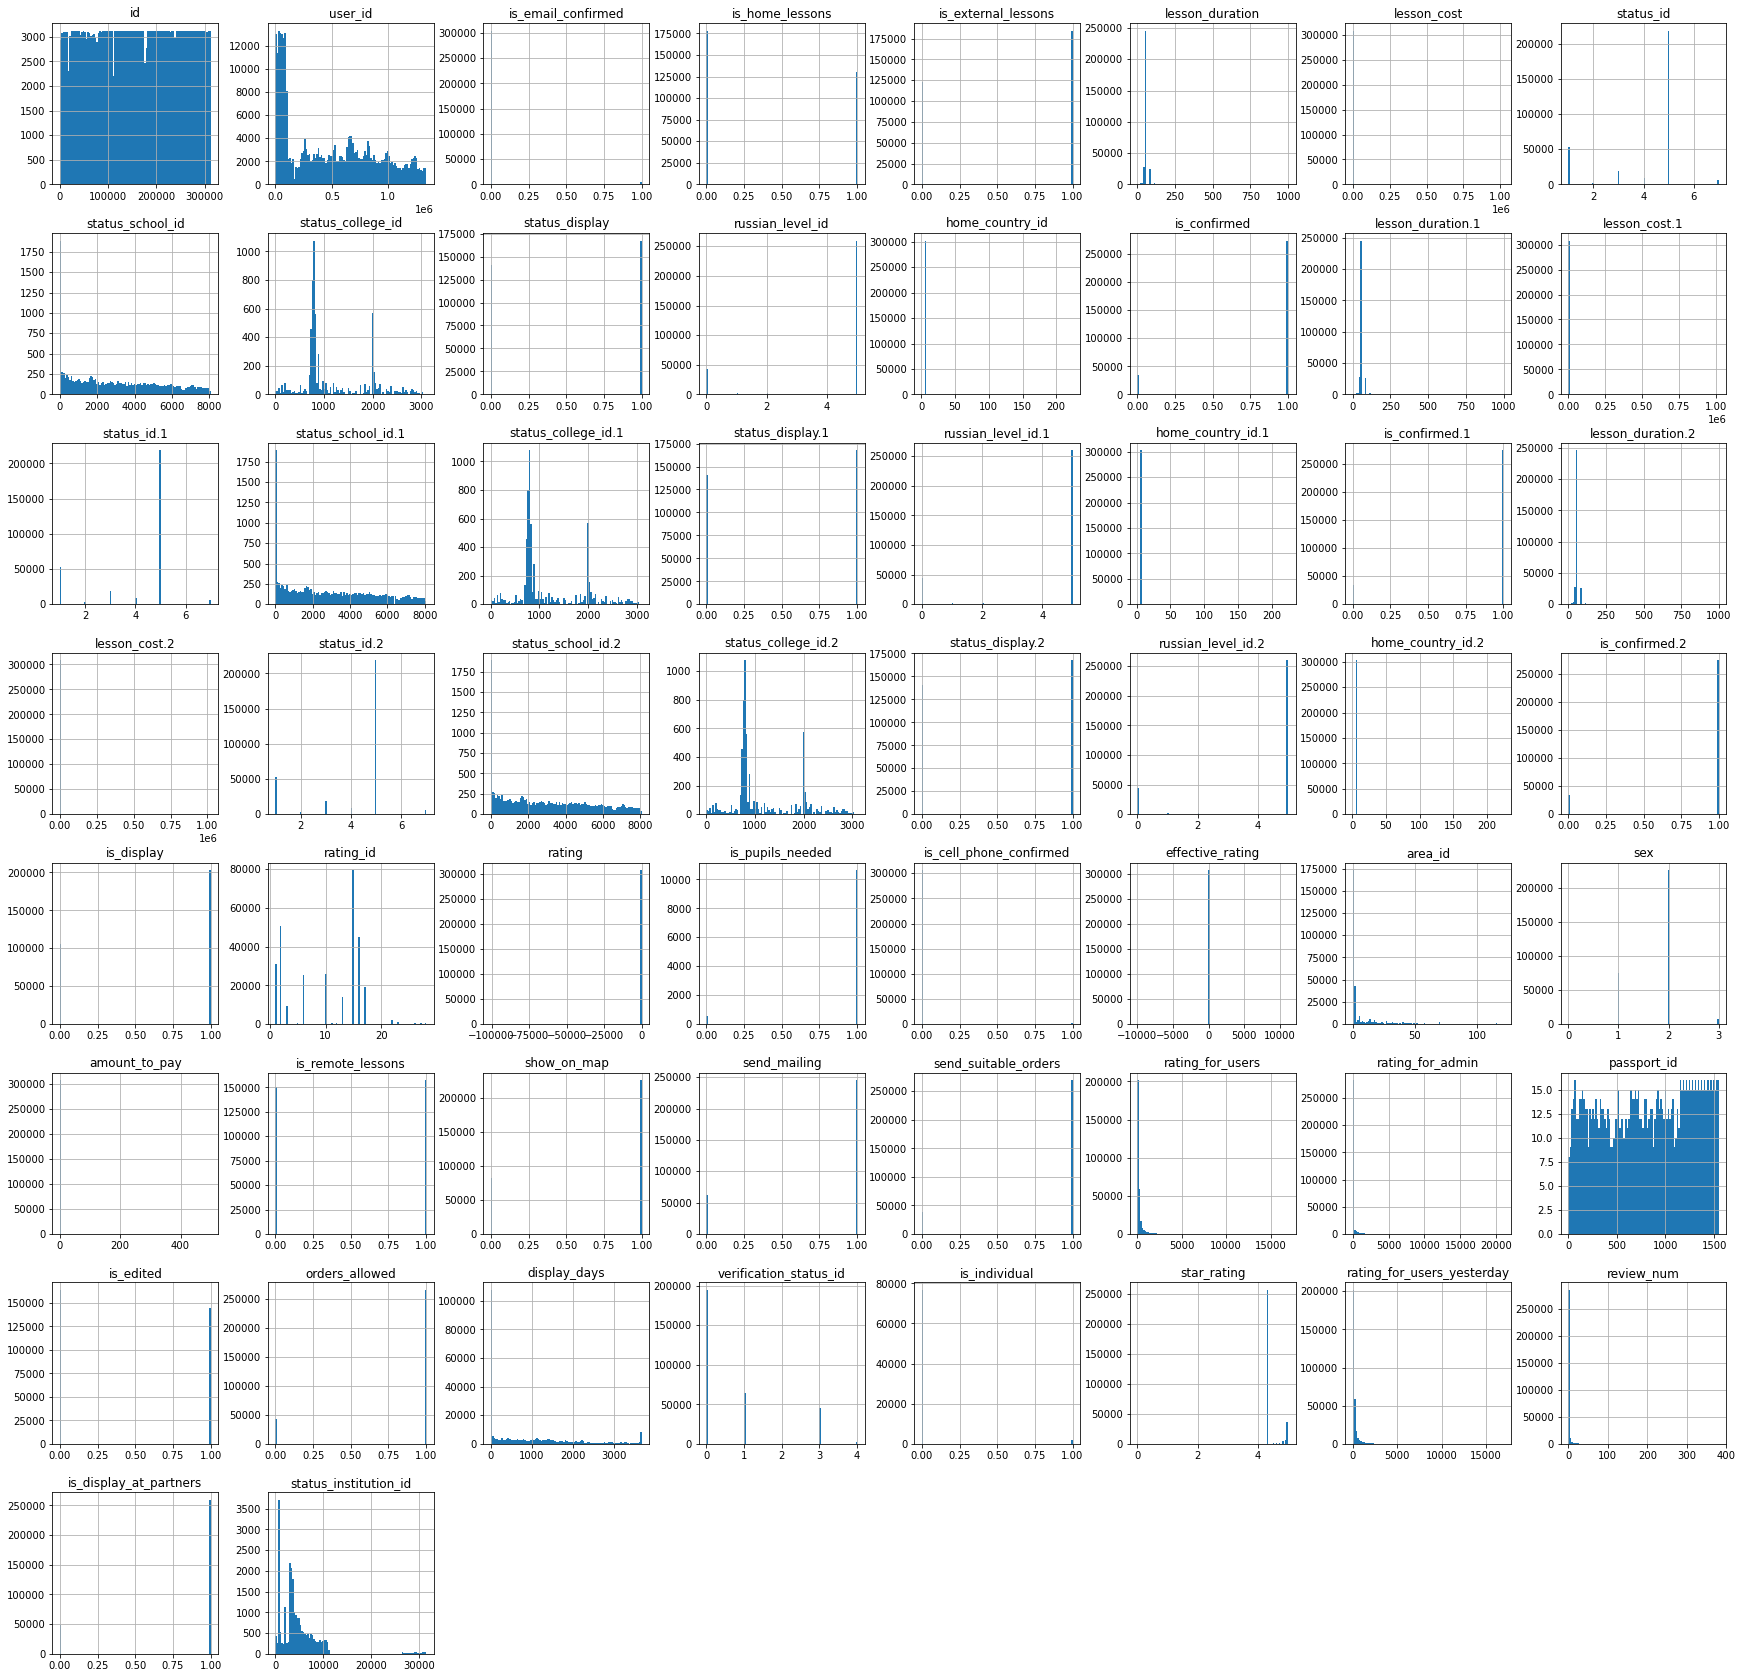

In [35]:
teachers_info.hist(figsize = (30, 30), bins = 100);

In [36]:
teachers_info['user_id'].duplicated().sum()

0

In [37]:
(teachers_info['rating_for_users_yesterday'] != teachers_info['rating_for_users']).sum()

6030

- в датасете `teachers_info` **307 972** строк, 80 столбцов
- дубликаты **отсутствуют**
- дубликаты идентификатора `user_id` **отсутствуют**
- пропуски в индексе **отсутствуют**
- имеются многочисленные **пропуски** данных
- столбцы `rating_for_users` и `rating_for_users_yesterday` практически идентичны, предлагается оставить только `rating_for_users`, как более долгосрочный
- основная часть данных представляется малополезной для прогнозирования, за исключением рейтингов: `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `star_rating`

#### Удалим лишние столбцы

In [38]:
teachers_info = teachers_info[['user_id', 'rating', 'rating_for_admin',
                              'rating_for_users',
                              'rating_id','star_rating']]
teachers_info.head(2)

,user_id,rating,rating_for_admin,rating_for_users,rating_id,star_rating
0,45,5,237.5,1138.0,15,4.500000
1,63,-3,0.0,25.0,4,4.300781


- в датасете `teachers_info` оставлены только столбцы с рейтингами `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `star_rating`

## Создадим новые признаки

### Добавим в датасет `suitable_teachers` рейтинги учителей из  датасета `teachers_info` 

In [39]:
suitable_teachers = suitable_teachers.join(teachers_info.set_index('user_id'),
                                           on='teacher_id')

suitable_teachers = suitable_teachers.fillna(0)

In [40]:
suitable_teachers.head(3)

,teacher_id,order_id,enable_auto_assign,enable_assign,rating,rating_for_admin,rating_for_users,rating_id,star_rating
0,82583,1742711,1,1,7.0,882.0,1191.0,17.0,5.0
1,125057,1742713,0,0,-5.0,0.0,210.0,6.0,5.0
2,231211,1742713,0,0,0.0,0.0,0.0,0.0,0.0


##### Проверим, что у учителей с одним идентификатором одинаковые параметры

In [41]:
suitable_teachers[suitable_teachers['teacher_id'] == 64342].head()

,teacher_id,order_id,enable_auto_assign,enable_assign,rating,rating_for_admin,rating_for_users,rating_id,star_rating
3641,64342,1743280,0,0,-1.0,0.0,25.0,2.0,4.300781
3986,64342,1743134,0,0,-1.0,0.0,25.0,2.0,4.300781
5274,64342,1743401,0,0,-1.0,0.0,25.0,2.0,4.300781
8434,64342,1743679,0,0,-1.0,0.0,25.0,2.0,4.300781
9878,64342,1744024,0,0,-1.0,0.0,25.0,2.0,4.300781


In [42]:
suitable_teachers.isna().sum().sum()

0

- в датасет `suitable_teachers` добавлены признаки рейтингов учителей из датасета `teachers_info`

### Выделим из признака `purpose` признак подготовки к экзаменам

- объявим функцию выделения цели занятий из признака `purpose`

In [43]:
def purpose_determination(text):

    result = 0

    purpose = {1 : ['ГИА', 'ЕГЭ', 'ОГЭ', 'ВПР', 'ДВИ', 'экзамен'],
               2: ['HSK', 'DELE', 'Никонгу', 'иероглифика', 'каллиграфия',
                     'A-level', 'BEC', 'CAE', 'CPE', 'ESOL Pitman', 'FCE', 'GMAT', 'GRE',
                     'IELTS', 'ILEC', 'KET', 'PET', 'SAT', 'TKT', 'TOEFL', 'TOEIC', 'YLE',
                     'DSD', 'DSH', 'Goete-Zertifikat', 'KDS', 'Sprachtest', 'TestDAF', 'ZDaF', 'ZMP',
                     'CELI', 'CILS', 'PLIDA','язык', 'барьер'],
               3: ['олимпиада', 'углубленное', 'школьн', 'объяснить', 'помощь', 'уровень',
                         'успеваемость', 'нагнать'],
               4: ['бизнес'],
               5: ['другое']
              }
    for goal in purpose:
        for item in purpose[goal]:
            if item in text:
                result = goal

    return result

##### Проверим работу функции

In [44]:
data['purpose'][3]

'Разделы: общий курс.\nКатегория ученика: студентка 4 курса медицинского Вуза.\nУровень знаний: начинающий.\nЦель занятий: повысить уровень.'

In [45]:
purpose_determination(data['purpose'].values[3])

3

- объявлена функция выделения цели занятий из признака `purpose`

### Объявим функцию, которая создаст новые признаки

In [46]:
def new_features_creator(data, suitable_teachers, teachers_info):

    # Введем признак длины имени
    data.loc[:, 'purpose_len'] = data.loc[:,
                'purpose'].apply(len)
    
    # Введем признак длины доп. информаци
    data.loc[:, 'add_info_len'] = data.loc[:,
                'add_info'].apply(len)
   
    # Введем признак цели занятий
    data.loc[:, 'purpose_code'] = data.loc[:,
                'purpose'].apply(purpose_determination)
    
    #Введем признаки времени

    data['year'] = data['order_date'].dt.year
    data['month'] = data['order_date'].dt.month
    data['day'] = data['order_date'].dt.day
    data['dayofweek'] = data['order_date'].dt.dayofweek
    data['hour'] = data['order_date'].dt.hour

    # Создадим признаки обеспеченности каждой заявки учителями и их средних рейтингов 
    
    
    agg_ratings = pd.pivot_table(suitable_teachers, index = 'order_id',
                  values = sorted(suitable_teachers.drop(['order_id', 'teacher_id'], axis = 1)),
                                 aggfunc = 'mean').reset_index(drop = False)
    
    agg_ratings['suitable_teachers'] = pd.pivot_table(suitable_teachers, index = 'order_id',
                  values = 'teacher_id',
                aggfunc = ('count')).reset_index(drop = False)['teacher_id']
    
    # Присоединим к основному датасету

    data = data.join(agg_ratings.set_index('order_id'), on='id')
    
    # Если у заявки нет какого-то рейтинга, проставим рейтинг 0
    data = data.fillna(0)


    return data

#### Объявим функцию, которая обработает дубликаты заявок: пометит первичные заявки, хотя бы один дубликат которой оказался оплачен, как оплаченные, и удалим дубликаты

In [47]:
def dup_orders_processing(data):

   
    # Унифицируем значение столбца `payment` для первичных заявок и дубликатов заявок
    # - если где-то есть `1`, то везде проставим `1`
    
    columns_to_agg = ['payment']                     

    sorted_order = pd.pivot_table(data, index = 'original_order_id',
    values = (columns_to_agg), aggfunc = ('max'))

    #sorted_order[sorted_order['payment'] >0] = 1

    data_index = data.index
    data.index = data['original_order_id']
    data.loc[sorted_order.index, columns_to_agg] = \
             sorted_order[columns_to_agg]
    data.index = data_index


    # Удалим все дубликаты заявок, так как нам нужно определить вероятность оплаты первичной заявки

    data = data.loc[data['original_order_id'] == data['id'], :]

    data = data.reset_index(drop = True)

   
    return data

#### Объявим функцию, которая удалит лишние столбцы

In [48]:
def columns_remover(data):
    
    # Удалим столбцы с информацией, несущей утечку целевого признака или лишней для модели
    
    columns_to_drop = ['working_teacher_id', 
                       #'add_info', 'purpose',
                       'order_date', 'id', 'original_order_id', 
                       'payment'
                      ]
        
    for column in columns_to_drop:
        try:
            data = data.drop(column, axis = 1)
        except:
            pass
    
    return data

## Подготовим данные для машинного обучения

#### Объявим функцию, которая создаст массив признаков и вектор целевого признака

In [49]:
def features_creation(data, suitable_teachers, teachers_info):
    
    
    # Создадим новые признаки
    data = new_features_creator(data, suitable_teachers, teachers_info)
    
    # Обработаем дубликаты заявок
    data = dup_orders_processing(data)
    
    # Выделим вектор целевого признака
    target = data['payment']
    
    # Удалим лишние столбцы
    features = columns_remover(data)
    
    
    return features, target

### Создадим на базе массива `train_data` на массив признаков `features_train` и вектор целевого признака `target_train`

In [50]:
features, target = features_creation(train_data, 
                         suitable_teachers, teachers_info)

#### Уменьшим размер выборки для подбора гиперпараметров для ускорения скорости обучения - создадим стратифицированную выборку размером `0.2` от обучающей выборки

In [51]:
features_train, _features_valid_, target_train, _target_valid_ = train_test_split(features, target, 
                            random_state = RANDOM_STATE,
                            shuffle = True,
                            test_size = 0.8,
                            stratify = target)

In [52]:
print('Размерность обучающей выборки:', features_train.shape, '\n')
print('Состав признаков: \n', sorted(features_train.columns), '\n')
print('Распределение значений в векторе целевого признака:')
print(target_train.value_counts())

Размерность обучающей выборки: (90998, 37) 

Состав признаков: 
 ['add_info', 'add_info_len', 'chosen_teachers_only', 'day', 'dayofweek', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lesson_price', 'lessons_per_week', 'minimal_price', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose', 'purpose_code', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'source_id', 'star_rating', 'subject_id', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year'] 

Распределение значений в векторе целевого признака:
0    71227
1    19771
Name: payment, dtype: int64


- создан массив признаков `features_train` и вектор целевого признака `target_train`, в котором:
    - удалены дубликаты заявок
    - в случае, если хотя бы один из дубликатов был оплачен, первичной заявке присваивается статус `оплачена` (**целевой признак** = 1)
    - созданы новые признаки длины полей `purpose_len` и `add_info_len`, содержащие длину признаков `purpose` и `add_info`
    - создан новый признак цели занятий `purpose_code`, содержащий цель занятий
    - созданы новые признаки `года`, `месяца`, `дня`, `дня недели` и `часа` создания заявки
    - созданы новые признаки `suitable_teachers` (количество подходящих к заявке учителей), `enable_assign` (средняя возможность назначиться), `enable_auto_assign` (средняя возможность автоматического назначения)
    - созданы новые признаки `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `source_id`, `star_rating`, содержащие **средние** рейтинги учителей, подходящих к заявке
    - из массива признаков удалены столбцы `order_date`, `client_id`, `creator_id`, `id`, `original_order_id`, `working_teacher_id` и `payment`, содержащие **утечку целевого признака**

## Проведем исследовательский анализ признаков

#### Создадим массив признаков для исследования путем добавления вектора целевого признака в массив признаков

In [53]:
transformed_features = features_train.copy(deep=True)
transformed_features['payment'] = target_train

In [54]:
transformed_features.head(2)

,add_info,chosen_teachers_only,home_metro_id,is_display_to_teachers,lesson_duration,lesson_place_new,lesson_price,lessons_per_week,minimal_price,no_teachers_available,planned_lesson_number,pupil_category_new_id,pupil_knowledgelvl,purpose,source_id,subject_id,teacher_age_from,teacher_age_to,teacher_experience_from,teacher_experience_to,teacher_sex,purpose_len,add_info_len,purpose_code,year,month,day,dayofweek,hour,enable_assign,enable_auto_assign,rating,rating_for_admin,rating_for_users,rating_id,star_rating,suitable_teachers,payment
206573,"Район: г. Керчь.\nМесто проведения занятий: у ученика (г. Керчь), дистанционно (например, Skype).МОСКОВСКОЕ ВРЕМЯ.\nПредполагаемое число занятий в неделю: 2-3. Занятия по скользящему графику, после 12 часов. МОСКОВСКОЕ ВРЕМЯ.\nОпыт репетитора: от 5 лет.\nВозраст репетитора: от 24 лет до 45 лет.\nПол репетитора: не имеет значения.\nСтатус репетитора: не имеет значения.",0,1995,1,90,5,1000,5,0,0,10,15,0,"Разделы: школьный курс, ботаника, зоология.\nДополнения: ЕГЭ.\nКатегория ученика: абитуриентка.\nЦель занятий: пересдача ЕГЭ.",23,12,24,45,5,0,3,123,364,3,2022,9,1,3,14,0.033333,0.066667,0.133333,0.0,16.828125,1.5,1.313477,30.0,0
252013,unknown,0,1881,1,60,0,0,0,0,0,0,0,0,unknown,16,8,16,16,0,0,0,7,7,0,2022,10,10,0,18,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0


### Изучим распределение признаков и целевого признака

#### Проверим дисбаланс классов

Количество значений каждого класса в выборке:

0    71227
1    19771
Name: payment, dtype: int64 

Доля значений каждого класса в выборке:

0    0.78
1    0.22
Name: payment, dtype: float64


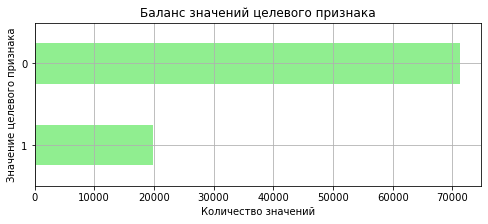

In [55]:
print('Количество значений каждого класса в выборке:\n')
print(target_train.value_counts(), '\n')
print('Доля значений каждого класса в выборке:\n')
print(round(target_train.value_counts()/target_train.count(),2))

target_train.value_counts(ascending = True).plot(
                              kind = 'barh',
                              grid = True,
                              color = 'lightgreen',
                              figsize = (8, 3));
plt.title('Баланс значений целевого признака');
plt.xlabel('Количество значений');
plt.ylabel('Значение целевого признака');

- имеется **сильный** дисбаланс классов: в векторе **целевого признака**  22% значений единичного класса (оплачено) и 78% нулевых значений (не оплачено), что необходимо учесть при обучении моделей (нужна балансировка)

#### Изучим распределение категориальных признаков в зависимости от значения целевого признака

##### Объявим функцию `interval_categorical_text`, которая определяет, какие признаки являются количественными, категориальными и текстовыми

In [56]:
def interval_categorical_text(data):
    interval_cols = []
    categorical_cols = []
    text_cols = []
    
    for column in data.columns:
        if data[column].dtype == 'object':
            text_cols.append(column)
        
        elif data[column].nunique() >36:
            interval_cols.append(column)
            
        else:
            categorical_cols.append(column)
            
            
    print('\ninterval_cols\n', sorted(interval_cols))
    print('\ncategorical_cols\n', sorted(categorical_cols))
    print('\ntext_cols\n', sorted(text_cols))
    
    return interval_cols, categorical_cols, text_cols

In [57]:
interval_cols, categorical_cols, text_cols = interval_categorical_text(transformed_features)


interval_cols
 ['add_info_len', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'lesson_price', 'minimal_price', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'star_rating', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to']

categorical_cols
 ['chosen_teachers_only', 'day', 'dayofweek', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lessons_per_week', 'month', 'no_teachers_available', 'payment', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose_code', 'source_id', 'subject_id', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']

text_cols
 ['add_info', 'purpose']


#### Выделим для анализа попарного распределения категориальных признаков в зависимости от значений целевого признака категориальные признаки с небольшим количеством категорий

In [58]:
cols_to_explore = transformed_features[categorical_cols].nunique().sort_values(ascending = False).tail(10).index

In [59]:
cols_to_explore

Index(['lesson_duration', 'purpose_code', 'planned_lesson_number',
       'pupil_knowledgelvl', 'teacher_sex', 'year', 'chosen_teachers_only',
       'is_display_to_teachers', 'no_teachers_available', 'payment'],
      dtype='object')

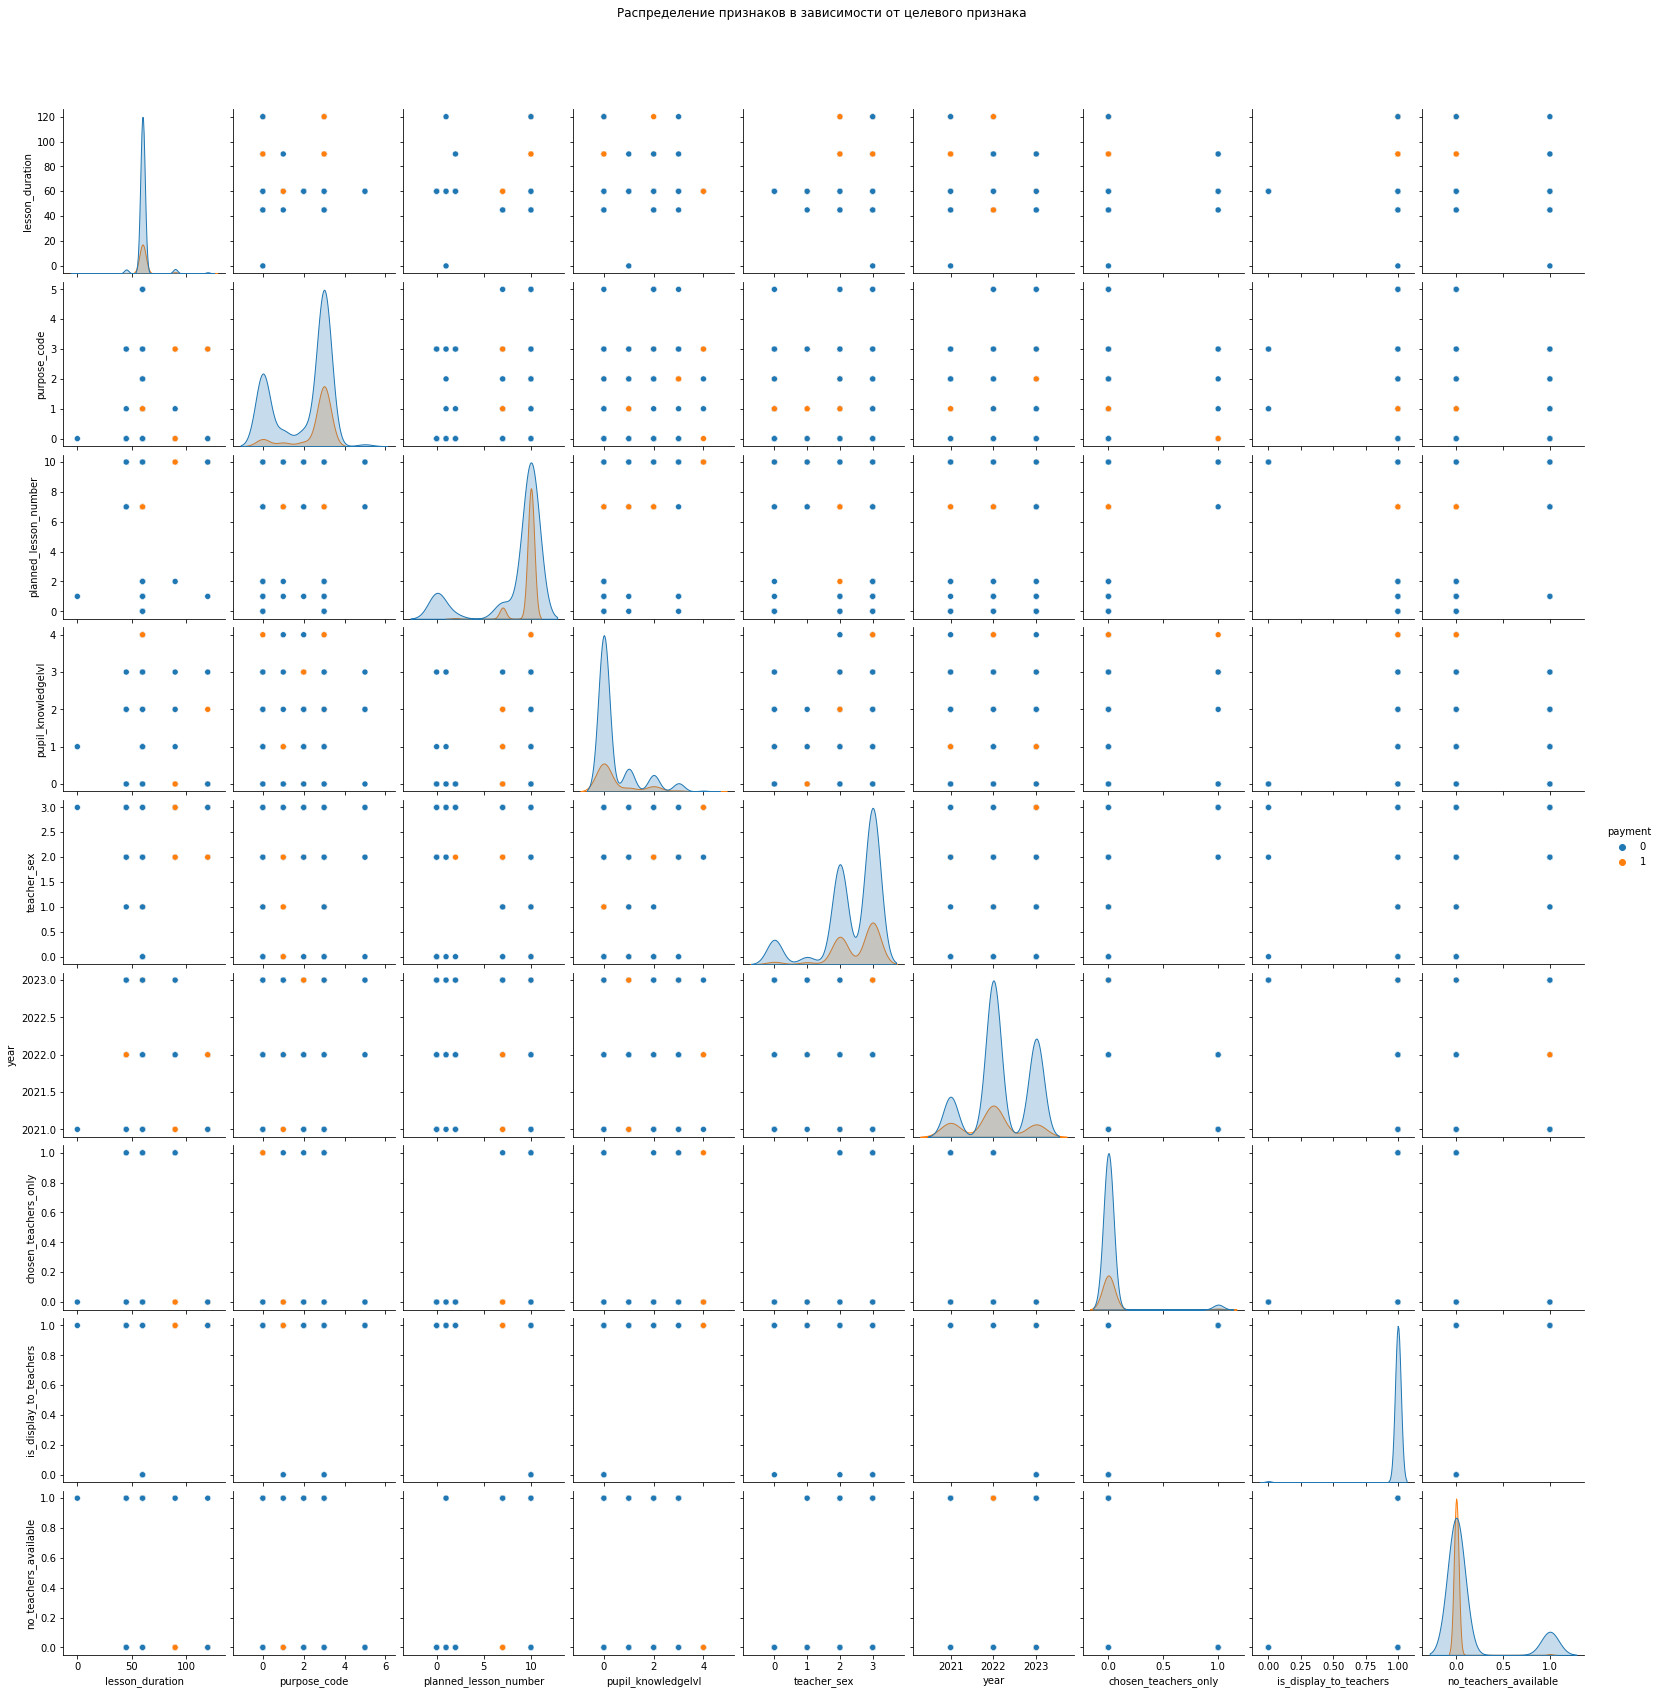

In [60]:
g = sns.pairplot(transformed_features[cols_to_explore].sample(frac = 0.01,
                 random_state=RANDOM_STATE), hue='payment');

g.fig.suptitle('Распределение признаков в зависимости \
от целевого признака', y=1.05);

- **Анализ распределения категориальных признаков в зависимости от целевого признака** показывает практически идентичное распределение значений категориальных признаков в оплаченных и не оплаченных заявках, в поправкой на дисбаланс классов, за исключением признаков `no_teachers_available` - в оплаченных заявках удельный вес нулевого значения признака (есть доступные учителя) значительно превышает удельный вес признака в неоплаченных заявках, а также `planned_lesson_number` - в оплаченных заявках доля количества уроков = 10 значительно больше доли этого количества уроков в неоплаченных заявках

#### Изучим распределение количественных признаков в зависимости от значения целевого признака

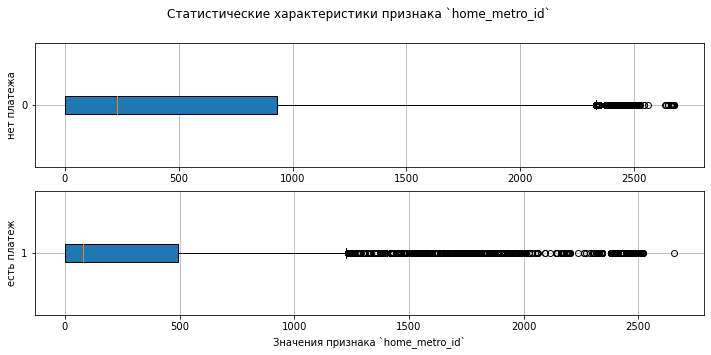

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,531.771295,664.759101,0.0,0.0,228.0,933.0,2674.0
есть платеж,19771.0,385.031207,611.422264,0.0,0.0,79.0,493.0,2654.0


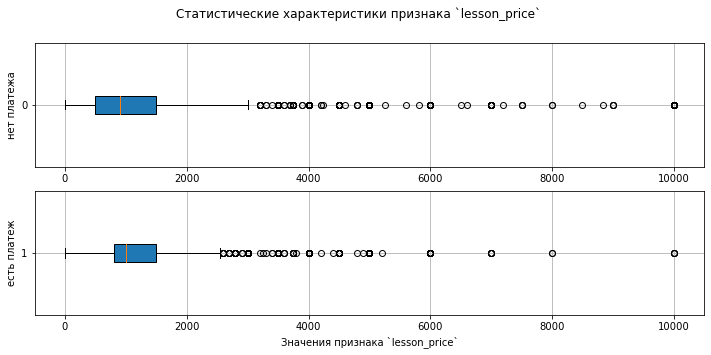

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,1015.603647,860.802479,0.0,500.0,900.0,1500.0,10000.0
есть платеж,19771.0,1306.016843,756.087966,0.0,800.0,1000.0,1500.0,10000.0


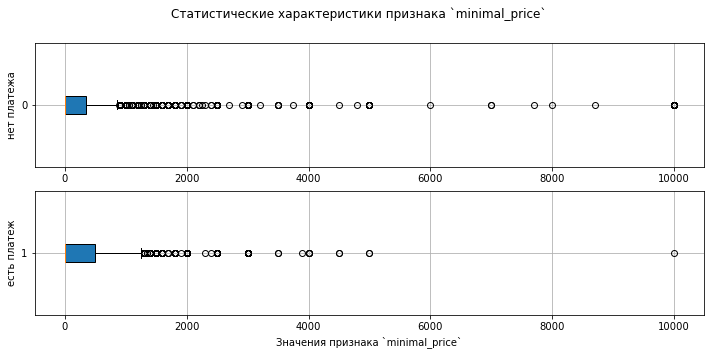

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,193.009898,403.403981,0.0,0.0,0.0,350.0,10000.0
есть платеж,19771.0,332.985332,467.037891,0.0,0.0,0.0,500.0,10000.0


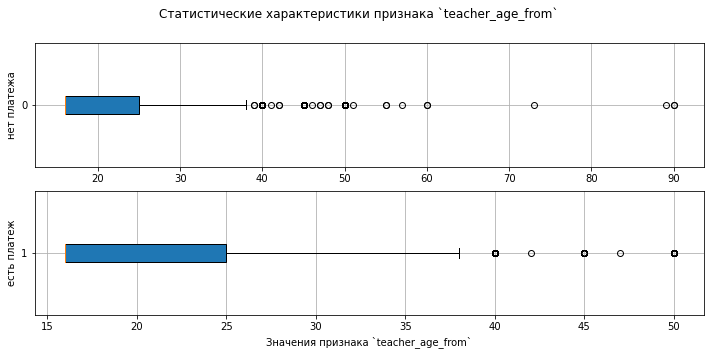

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,19.294046,5.505171,16.0,16.0,16.0,25.0,90.0
есть платеж,19771.0,20.232006,5.862256,16.0,16.0,16.0,25.0,50.0


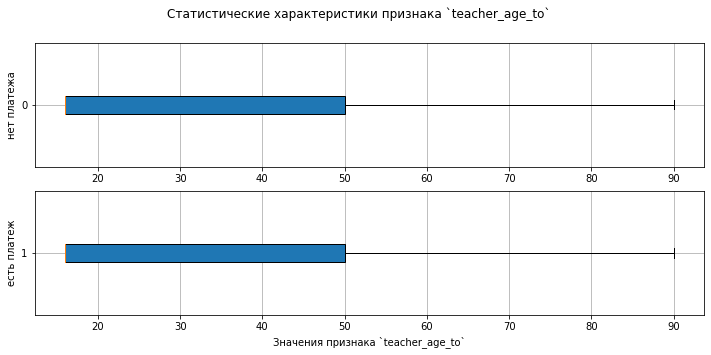

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,31.079577,22.651540,16.0,16.0,16.0,50.0,90.0
есть платеж,19771.0,31.898639,22.292529,16.0,16.0,16.0,50.0,90.0


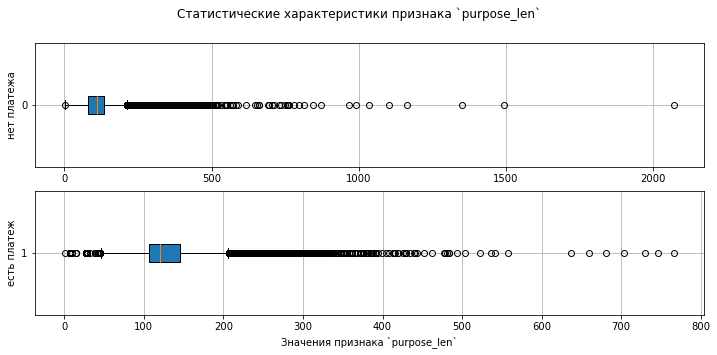

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,106.493015,59.622039,2.0,81.0,110.0,133.0,2070.0
есть платеж,19771.0,130.277477,44.660008,1.0,106.0,121.0,146.0,766.0


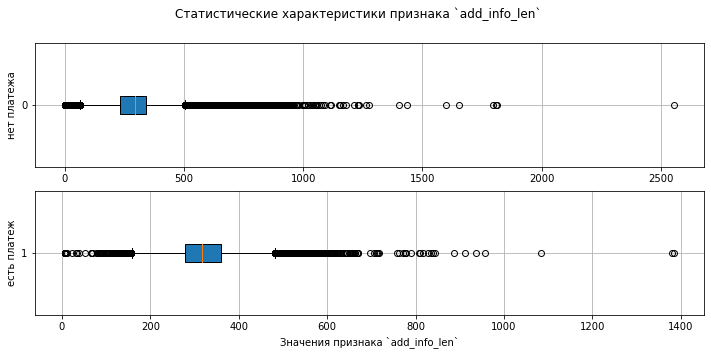

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,267.848358,130.895129,1.0,230.0,294.0,340.0,2554.0
есть платеж,19771.0,321.731020,72.088405,7.0,279.0,316.0,360.0,1384.0


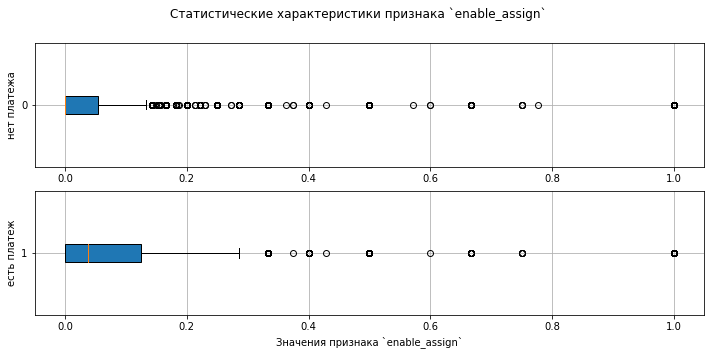

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,0.088305,0.218846,0.0,0.0,0.000000,0.054054,1.0
есть платеж,19771.0,0.155594,0.282884,0.0,0.0,0.037037,0.125000,1.0


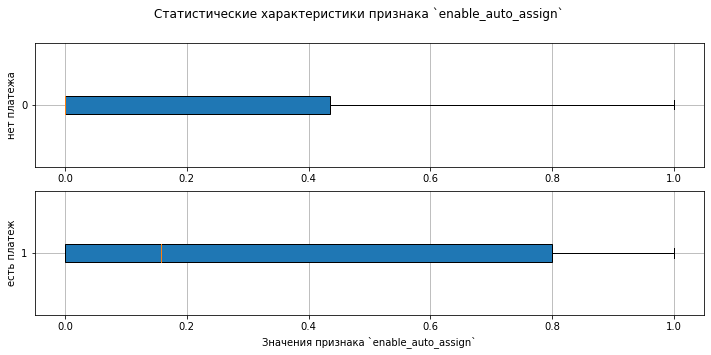

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,0.244097,0.371134,0.0,0.0,0.000000,0.434783,1.0
есть платеж,19771.0,0.367490,0.401700,0.0,0.0,0.157895,0.800000,1.0


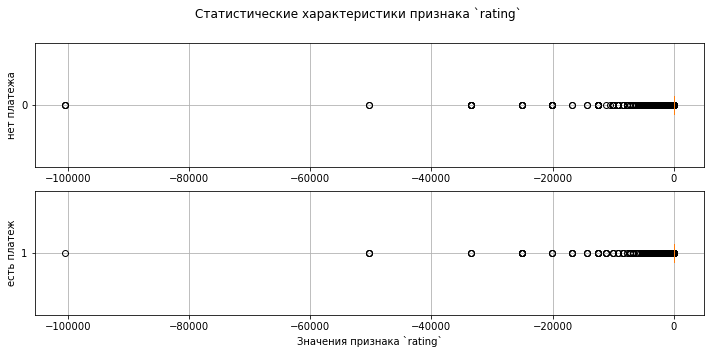

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,-31.860849,884.608103,-100500.0,-0.477525,0.00,0.000000,10.0
есть платеж,19771.0,-75.972006,1276.203093,-100500.0,-1.100000,-0.15,0.214286,8.0


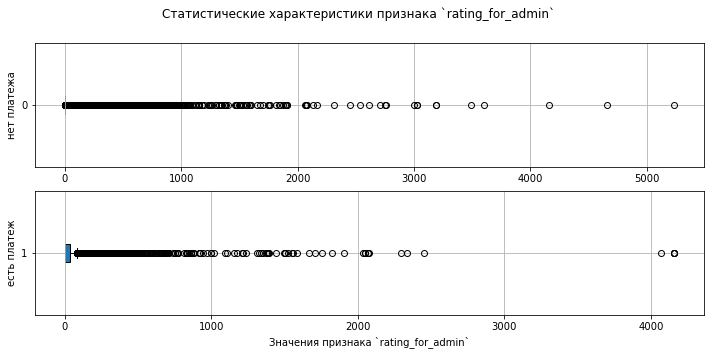

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,NaN,NaN,0.0,0.0,0.0,0.00000,5232.0
есть платеж,19771.0,inf,inf,0.0,0.0,0.0,33.53125,4156.0


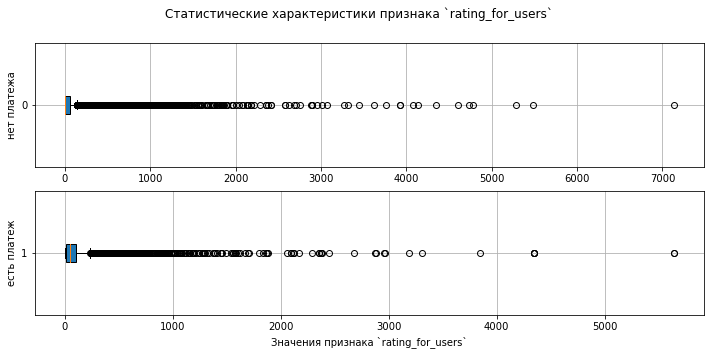

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,NaN,NaN,0.0,0.000000,2.50,55.390625,7132.0
есть платеж,19771.0,inf,inf,0.0,10.414062,43.75,100.625000,5640.0


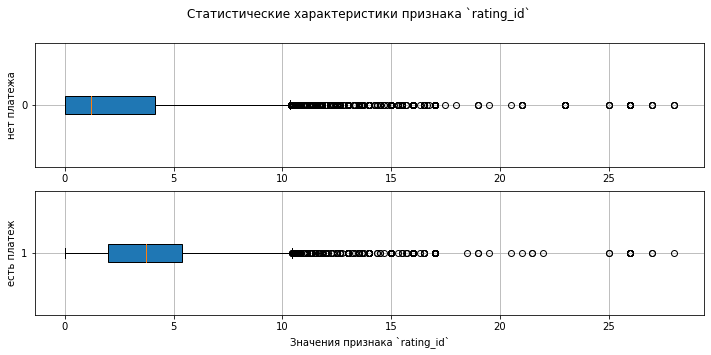

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,2.401750,3.112448,0.0,0.0,1.200000,4.142857,28.0
есть платеж,19771.0,3.931978,3.093198,0.0,2.0,3.714286,5.376179,28.0


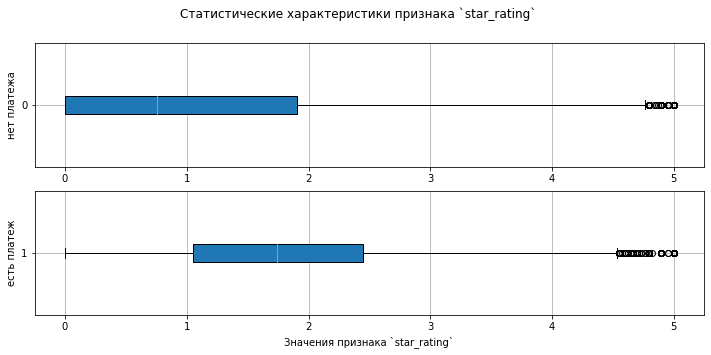

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,NaN,0.000000,0.0,0.00000,0.757324,1.907227,5.0
есть платеж,19771.0,1.782227,1.180664,0.0,1.05127,1.741211,2.449219,5.0


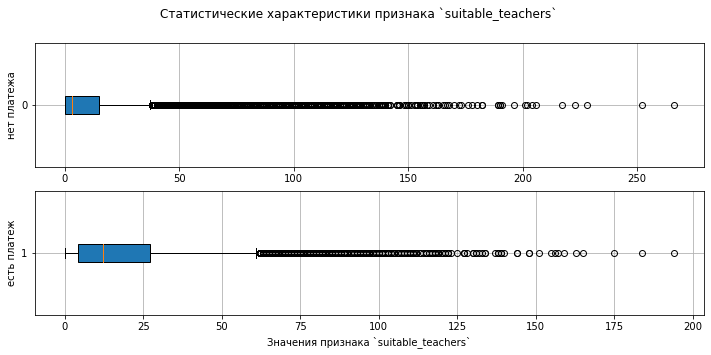

,count,mean,std,min,25%,50%,75%,max
нет платежа,71227.0,11.127452,18.479064,0.0,0.0,3.0,15.0,266.0
есть платеж,19771.0,18.722978,19.892251,0.0,4.0,12.0,27.0,194.0


In [61]:
for feature in interval_cols:
    print('\n')
    fig, ax = plt.subplots(2, 1, figsize = (12, 5));
    plt.suptitle("Статистические характеристики \
признака `" + feature + "`");

    box_0 = transformed_features[transformed_features['payment'] == 0][[feature]]
    ax[0].boxplot(box_0, vert = False,
                  patch_artist = True,
                  labels = '0');

    ax[0].grid(True);
    ax[0].set_ylabel('нет платежа');


    box_1 = transformed_features[transformed_features['payment'] == 1][[feature]]
    ax[1].boxplot(box_1, vert = False,
                 patch_artist = True,
                 labels = '1');
    ax[1].grid(True)
    ax[1].set_ylabel('есть платеж')


    plt.xlabel('Значения признака `' + feature + '`');
    plt.show();
    feature_descript = pd.DataFrame(box_0.describe())
    feature_descript['1'] = box_1.describe()

    feature_descript.columns = ['нет платежа', 'есть платеж']
    display(feature_descript.T)

- **Анализ распределения количественных признаков в зависимости от значения целевого признака показывает следующее:**

    - имеются многочисленные выбросы, при использовании линейных моделей нужно будет использовать **RobustScaler**
    
    - в распределении признаков `teacher_age_from`, `teacher_age_to`, `teacher_experience_from`, `teacher_experience_to` **отсутствуют** различия между оплаченными и неоплаченными заявками
    - наиболее заметным различия между оплаченными и неоплаченными заявками в распределениях следующих признаков:
        - `suitable_teachers` - 50% не оплаченных заявок имеют значение этого рейтинга менее 3, в то же время как 75% оплаченных имеет значение рейтинга более 4
        - `star_rating` - половина не оплаченных заявок имеет значение этого рейтинга менее 0.7, в то же время более 75% оплаченных заявок имеет значение этого рейтинга более 1
       - `rating_id` - половина не оплаченных заявок имеет значение этого рейтинга менее 1, при этом 75% оплаченных заявок имеет значение рейтинга более 2
       - `rating for users`- половина не оплаченных заявок имеет значение этого рейтинга менее 2, при этом 75% оплаченных заявок имеет значение рейтинга более 10       

       
- **Можно нарисовать следующий портрет потенциально оплаченной заявки**:
    - `suitable_teachers` более 3
    - `stars_rating` более 1
    - `rating_id` более 1
    - `rating for users` более 2

### Изучим корреляцию признаков с целевым признаком и мультиколлинеарность

In [62]:
corr_matrix = transformed_features[interval_cols+categorical_cols].sample(frac=0.01,
                        random_state = RANDOM_STATE).phik_matrix(
    interval_cols = interval_cols)

In [63]:
corr_matrix['payment'].sort_values(ascending = False).head(20)

payment                  1.000000
star_rating              0.402411
suitable_teachers        0.370374
purpose_len              0.316347
rating_id                0.304488
lesson_place_new         0.290434
no_teachers_available    0.263445
lessons_per_week         0.256928
add_info_len             0.253773
lesson_price             0.216494
pupil_category_new_id    0.182646
source_id                0.171541
minimal_price            0.168502
subject_id               0.165288
rating_for_users         0.156975
enable_auto_assign       0.147505
purpose_code             0.144588
planned_lesson_number    0.138490
home_metro_id            0.133823
rating_for_admin         0.108585
Name: payment, dtype: float64

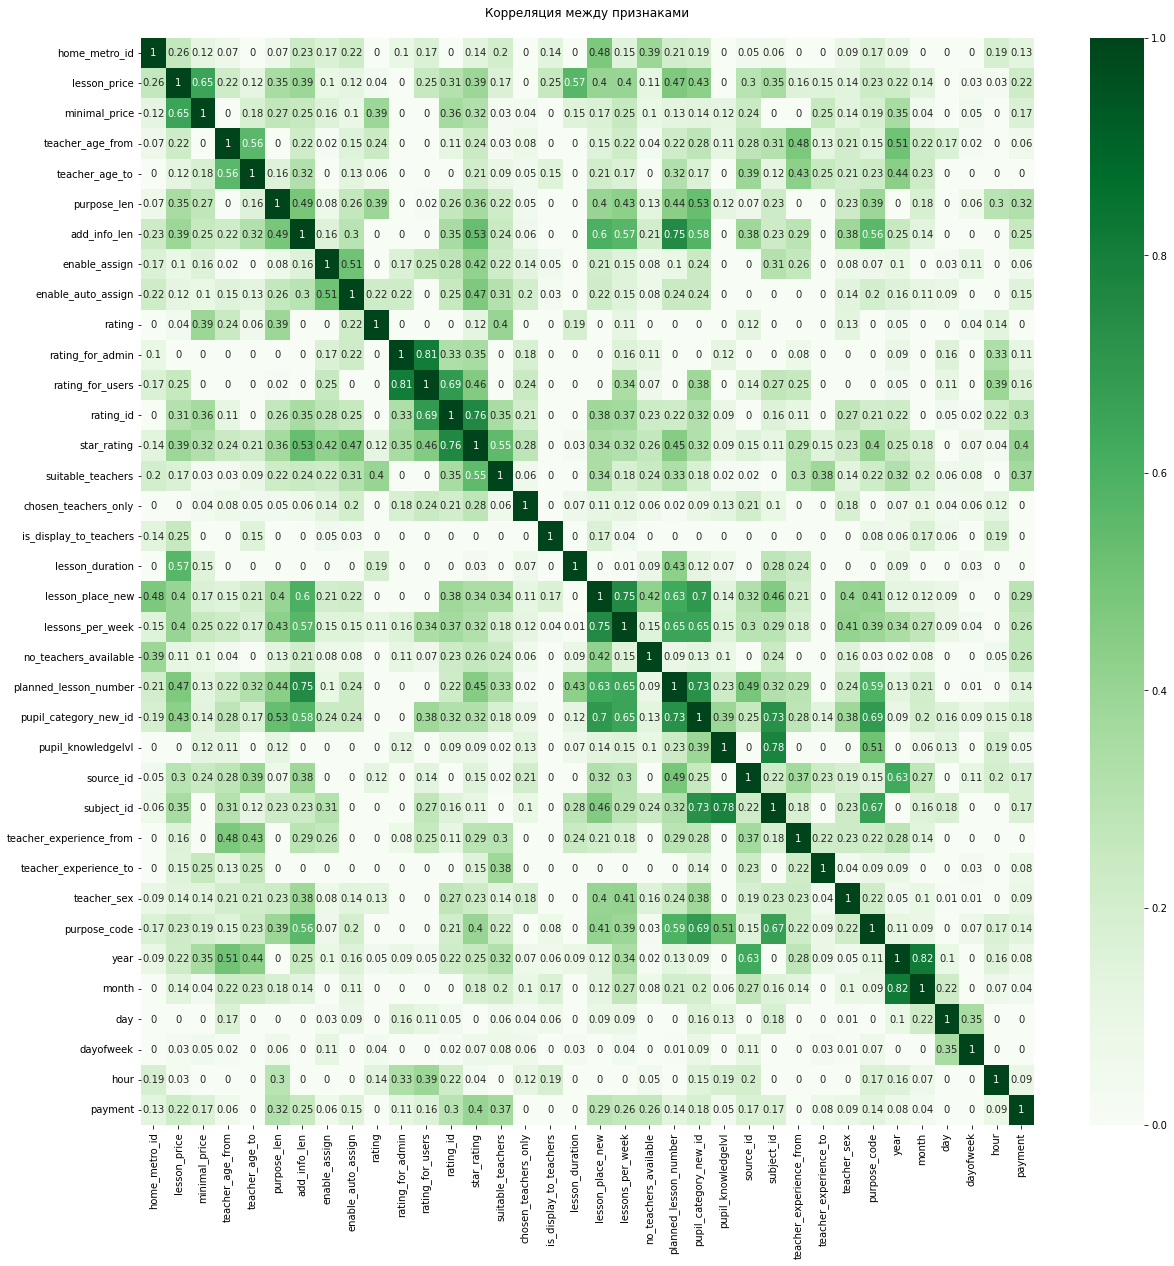

In [64]:
plt.figure(figsize = (20, 20))
plt.title('Корреляция между признаками\n');
sns.heatmap(round(abs(corr_matrix), 2),
            annot = True,
           cmap = 'Greens');
plt.show()

- наблюдается **умеренная корреляция** целевого признака со следующими признаками: `star_rating`, `no_teachers_available`, `lesson_place_new`, `add_info_len`, `purpose_code`,
- наблюдается **слабая корреляция** целевого признака со следующими признаками: `rating_id`, `enable_auto_assign`, `lessons_per_week`, `pupil_category_new_id`, `suitable_teachers`, `lesson_price`, `enable_assign`,   `home_metro_id`, `planned_lesson_number`, `source_id`,  `teacher_sex`,  `teacher_age_from`
- с остальными признаками корреляция **отсутствует**
- наблюдается **сильная мультиколлинеарность** между признаками `rating_for_admin` и `rating_for_users`, что необходимо учесть при обучении в случае использования линейных моделей

## Обучим и протестируем модели методом кросс-валидации

### Обучим и протестируем модель `RandomForestClassifier` методом `кросс-валидации`

#### Зададим неизменяемые гиперпараметры модели

In [65]:
rfc = RandomForestClassifier(
    random_state = RANDOM_STATE,
    n_jobs = -1,
    verbose = 0
    )

In [66]:
balancer = SMOTE(random_state=RANDOM_STATE)

#### Зададим трансформер столбцов  и упакуем в него кодировщики количественных и категориальных признаков

In [67]:
rfc_column_transformer = make_column_transformer(

    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),
     make_column_selector(dtype_include='object')),

    remainder='passthrough')

#### Сконструируем конвейер для предобработки данных и обучения модели

In [68]:
rfc_pipe = Pipeline(steps=[

    ("rfc_column_transformer", rfc_column_transformer),
    ("balancer", balancer),
    ("rfc", rfc)])
print(rfc_pipe)

Pipeline(steps=[('rfc_column_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x78ee7e750d60>)])),
                ('balancer', SMOTE(random_state=53)),
                ('rfc', RandomForestClassifier(n_jobs=-1, random_state=53))])


#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `AUC-ROC` методом `кросс-валидации`

- **Поиск гиперпараметров осуществлялся в следующих диапазонах**:

    - `n_estimators`: (1, 500),
    - `max_depth`: (1, 500),
    - `min_samples_leaf`: (1, 300),
    - `min_samples_split`: (2, 300)

In [69]:
# Наилучшая метрика 0.78 найдена при следующих гиперпараметрах:
rfc_param_distrs = {
    'rfc__n_estimators': IntDistribution(487, 487),
    'rfc__max_depth': IntDistribution(378, 378),
    'rfc__min_samples_leaf': IntDistribution(5, 5),
    'rfc__min_samples_split': IntDistribution(213, 213),
                      }

#### Объявим функцию поиска оптимальных гиперпараметров

In [70]:
rfc_search = OptunaSearchCV(
    rfc_pipe, 
    rfc_param_distrs,
    cv = TimeSeriesSplit(n_splits=10),
    n_trials=1,
    scoring='roc_auc',
    random_state = RANDOM_STATE,
                                )

/tmp/ipykernel_6167/1353708792.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  rfc_search = OptunaSearchCV(


#### Проведем поиск оптимальных гиперпараметров

In [71]:
rfc_search.fit(features_train, target_train)

[I 2024-05-22 11:19:07,992] A new study created in memory with name: no-name-7c09bed5-a128-446a-860d-dd2e7fa289d1
[I 2024-05-22 11:23:01,822] Trial 0 finished with value: 0.7767574273815494 and parameters: {'rfc__n_estimators': 487, 'rfc__max_depth': 378, 'rfc__min_samples_leaf': 5, 'rfc__min_samples_split': 213}. Best is trial 0 with value: 0.7767574273815494.


OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
               estimator=Pipeline(steps=[('rfc_column_transformer',
                                          ColumnTransformer(remainder='passthrough',
                                                            transformers=[('ordinalencoder',
                                                                           OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                          unknown_value=-1),
                                                                           <sklearn.compose._column_transformer.make_column_selector object at 0x7...
               n_jobs=1, n_trials=1,
               param_distributions={'rfc__max_depth': IntDistribution(high=378, log=False, low=378, step=1),
                                    'rfc__min_samples_leaf': IntDistribution(high=5, log=False, low=5, step=1),
                                    'rfc__min_samples_split': IntDistribution(high=213, log=False, low=213, step=1),
                                    'rfc__n_estimators': IntDistribution(high=487, log=False, low=487, step=1)},
               random_state=53, scoring='roc_auc')

In [72]:
print("\nЛучшее полученное методом кросс-валидации \n \
значение метрики ROC-AUC = %0.4f:" % rfc_search.best_score_,
"найдено при следующих параметрах")
print(rfc_search.best_params_)


Лучшее полученное методом кросс-валидации 
 значение метрики ROC-AUC = 0.7768: найдено при следующих параметрах
{'rfc__n_estimators': 487, 'rfc__max_depth': 378, 'rfc__min_samples_leaf': 5, 'rfc__min_samples_split': 213}


#### Выводы по результатам обучения и тестирования модели `RandomForestClassifier`

- лучшее полученное методом кросс-валидации значение метрики **AUC_ROC = 0.78**

### Обучим модель `CatBoost`

In [73]:
interval_cols, categorical_cols, text_cols = interval_categorical_text(features_train)


interval_cols
 ['add_info_len', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'lesson_price', 'minimal_price', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'star_rating', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to']

categorical_cols
 ['chosen_teachers_only', 'day', 'dayofweek', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lessons_per_week', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose_code', 'source_id', 'subject_id', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']

text_cols
 ['add_info', 'purpose']


In [74]:
features_train[categorical_cols] = features_train[categorical_cols].astype('int64')

#### Зададим неизменяемые гиперпараметры модели

In [75]:
cb = CatBoostClassifier(
    random_seed = RANDOM_STATE,
    cat_features = categorical_cols,
    text_features = text_cols,
    task_type="GPU",
    auto_class_weights = 'Balanced',
    verbose=False
    )

#### Зададим функцию, балансирующую классы

In [76]:
balancer = SMOTENC(random_state=RANDOM_STATE,
                   categorical_features = categorical_cols)

#### Сконструируем конвейер для балансировки данных и обучения модели

In [77]:
cb_pipe = Pipeline(steps=[
    #("balancer", balancer), - собственный балансировщик CatBoost дает метрику лучше
    ("cb", cb)])
print(cb_pipe)

Pipeline(steps=[('cb',
                 <catboost.core.CatBoostClassifier object at 0x78ef50ed7dc0>)])


#### Зададим диапазоны гиперпараметров для поиска оптимальной метрики `AUC-ROC` методом `кросс-валидации`

- поиск гиперпараметров производился на **100** шагах в следующих диапазонах:
    - `cb__learning_rate`: (0.00001, 1),
    - `cb__l2_leaf_reg`: (0, 400),
    - `cb__min_data_in_leaf`: (2, 400),
    - `cb__iterations`:  (1, 450),
    - `cb__depth`: (1, 9)

In [78]:
# Лучшая метрика 0.80
cb_param_distrs = {
    'cb__learning_rate': FloatDistribution(0.07173201354030484, 0.07173201354030484),
    'cb__l2_leaf_reg': IntDistribution(241, 241),
    'cb__min_data_in_leaf': IntDistribution(347, 347),
    'cb__iterations':  IntDistribution(379, 379),
    'cb__depth': IntDistribution(8, 8),
                      }

#### Объявим функцию `GridSearchCV` для поиска оптимальных гиперпараметров

In [79]:
cb_search = OptunaSearchCV(
    cb_pipe, 
    cb_param_distrs,
    cv = TimeSeriesSplit(n_splits=10),
    scoring = 'roc_auc',
    n_trials=1,
    random_state = RANDOM_STATE,
    verbose = 0
                        )

/tmp/ipykernel_6167/2524585734.py:1: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  cb_search = OptunaSearchCV(


#### Проведем поиск оптимальных гиперпараметров

In [80]:
cb_search.fit(features_train, target_train)

[I 2024-05-22 11:23:58,012] A new study created in memory with name: no-name-a094e183-2f2b-4561-9339-1b69efbd065b
[I 2024-05-22 11:29:12,118] Trial 0 finished with value: 0.8006091028149168 and parameters: {'cb__learning_rate': 0.07173201354030484, 'cb__l2_leaf_reg': 241, 'cb__min_data_in_leaf': 347, 'cb__iterations': 379, 'cb__depth': 8}. Best is trial 0 with value: 0.8006091028149168.


OptunaSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
               estimator=Pipeline(steps=[('cb',
                                          <catboost.core.CatBoostClassifier object at 0x78ef50ed7dc0>)]),
               n_jobs=1, n_trials=1,
               param_distributions={'cb__depth': IntDistribution(high=8, log=False, low=8, step=1),
                                    'cb__iterations': IntDistribution(high=379, log=False, low=379, step=1),
                                    'cb__l2_leaf_reg': IntDistribution(high=241, log=False, low=241, step=1),
                                    'cb__learning_rate': FloatDistribution(high=0.07173201354030484, log=False, low=0.07173201354030484, step=None),
                                    'cb__min_data_in_leaf': IntDistribution(high=347, log=False, low=347, step=1)},
               random_state=53, scoring='roc_auc')

In [81]:
print("\nЛучшее полученное методом кросс-валидации \n\
значение метрики ROC-AUC = %0.4f:" % cb_search.best_score_,
"найдено при следующих гиперпараметрах")
print(cb_search.best_params_)


Лучшее полученное методом кросс-валидации 
значение метрики ROC-AUC = 0.8006: найдено при следующих гиперпараметрах
{'cb__learning_rate': 0.07173201354030484, 'cb__l2_leaf_reg': 241, 'cb__min_data_in_leaf': 347, 'cb__iterations': 379, 'cb__depth': 8}


#### Выводы по результатам обучения и тестирования модели `CatBoostClassifier`

- в результате подбора гиперпараметров, обучения и кросс-валидации модели `CatBoostClassifier` было получено значение метрики **AUC_ROC = 0.8**, что превосходит метрику модели `RandomForestClassifier` (**0.78**)
- модель `CatBoostClassifier` с гиперпараметрами:

    - `auto_class_weights`: 'Balanced',
     
    может быть **рекомендована** для дальнейшего тестирования

### Сохраним лучшую модель

In [82]:
# save
joblib.dump(cb_search, "cb_model.pkl")

['cb_model.pkl']

### Изучим важность признаков для лучшей модели

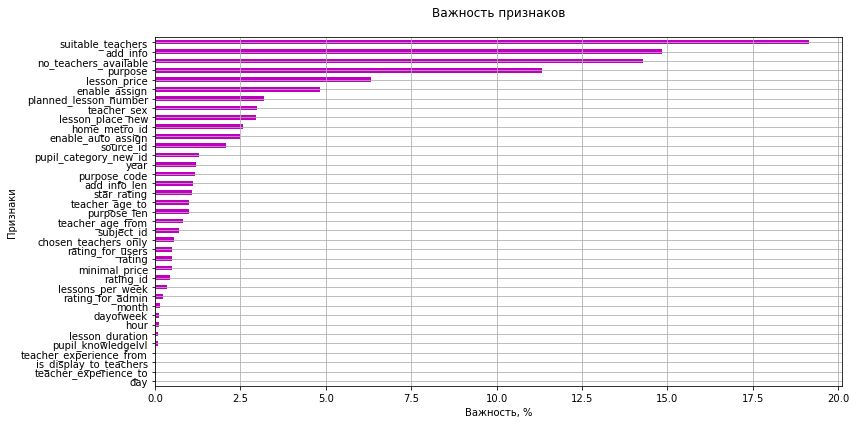

In [83]:
cb_imp = pd.Series(
    cb_search.best_estimator_[-1].get_feature_importance(),
    index = features_train.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(12,6))
cb_imp.plot.barh(ax=ax, color = 'm')
ax.set_title("Важность признаков\n")
ax.set_xlabel('Важность, %')
ax.set_ylabel('Признаки')
fig.tight_layout()
ax.grid(True)

In [84]:
important_features = cb_imp.sort_values(ascending = False).head(8)
display(important_features)
important_features = important_features.index
#important_features

suitable_teachers        19.153484
add_info                 14.831111
no_teachers_available    14.280317
purpose                  11.317773
lesson_price              6.333934
enable_assign             4.830402
planned_lesson_number     3.183246
teacher_sex               2.990858
dtype: float64

- анализ важности признаков демонстрирует, что **наиболее значимый** признак - это признак количества учителей, подходящих для заявки `suitable_teachers `
- на **втором** месте находится текстовый признак `add_info`,  затем признак `no_teachers_available`, затем идут текстовый признак `purpose`, `lesson_price` и `enable_assign`

## Протестируем модель `CatBoostClassifier`

### Проверим значение метрики `AUC-ROC` на тестовой выборке, содержащей не обработанные данные

#### Создадим тестовую выборку из сырых данных

In [85]:
features_test = preprocessing(test_data)

In [86]:
features_test, target_test = features_creation(features_test, 
                                               #teacher_train_payability, 
                         suitable_teachers, teachers_info)

In [87]:
display(features_test.shape)
print(sorted(features_test.columns))
print(target_test.value_counts())

(153729, 37)

['add_info', 'add_info_len', 'chosen_teachers_only', 'day', 'dayofweek', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lesson_price', 'lessons_per_week', 'minimal_price', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose', 'purpose_code', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'source_id', 'star_rating', 'subject_id', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']
0    128022
1     25707
Name: payment, dtype: int64


In [88]:
interval_cols, categorical_cols, text_cols = interval_categorical_text(features_test)


interval_cols
 ['add_info_len', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'lesson_price', 'minimal_price', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'star_rating', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to']

categorical_cols
 ['chosen_teachers_only', 'day', 'dayofweek', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lessons_per_week', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose_code', 'source_id', 'subject_id', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']

text_cols
 ['add_info', 'purpose']


In [89]:
features_test[categorical_cols] = features_test[categorical_cols].astype('int64')

In [90]:
features_test.tail(3)

,add_info,chosen_teachers_only,home_metro_id,is_display_to_teachers,lesson_duration,lesson_place_new,lesson_price,lessons_per_week,minimal_price,no_teachers_available,planned_lesson_number,pupil_category_new_id,pupil_knowledgelvl,purpose,source_id,subject_id,teacher_age_from,teacher_age_to,teacher_experience_from,teacher_experience_to,teacher_sex,purpose_len,add_info_len,purpose_code,year,month,day,dayofweek,hour,enable_assign,enable_auto_assign,rating,rating_for_admin,rating_for_users,rating_id,star_rating,suitable_teachers
153726,Район: Ленинский район.\nМесто проведения занятий: у преподавателя.\nПредполагаемое число занятий в неделю: 1-2.\nОпыт репетитора: не имеет значения.\nВозраст репетитора: не имеет значения.\nПол репетитора: женский.\nСтатус репетитора: не имеет значения.\nЖелаемое время для занятий: вторник - 13.,0,2262,1,60,2,1500,3,0,0,10,15,0,Категория ученика: взрослый.\nЦель занятий: поставить звуки.,23,20,16,16,0,0,2,59,290,0,2023,11,5,6,23,0.0,0.0,0.00,0.0,0.0,0.00,0.00000,0.0
153727,Желаемое время для занятий: понедельник - в любое время.\nКоличество занятий в неделю: больше 3.\nОпыт репетитора: без опыта.\nВозраст репетитора: от 16 лет до 90 лет.\nПол репетитора: Не важно.\nСтатус репетитора: частный преподаватель.\n,0,1012,1,60,6,900,7,0,0,10,12,0,Дополнения: ЕГЭ.\nКатегория ученика: 11 класс.\nПредполагаемая дата экзамена: 2024-06-30.\nЖелаемый балл на экзамене: 100.\nТекущий балл на экзамене: 80.\n,18,1,16,90,0,0,0,150,233,1,2023,11,5,6,23,0.0,0.0,0.15,0.0,2.5,0.95,0.64502,20.0
153728,"Желаемое время для занятий: понедельник - 15, 16, 17, 18, 19; вторник - 17, 18, 19; среда - 15, 16, 17, 18, 19; четверг - 17, 18, 19; пятница - 15, 16, 17, 18, 19.\nКоличество занятий в неделю: 1-2.\nВозраст репетитора: не важно.\nПол репетитора: Не важно.\n",0,2276,1,60,2,900,3,0,1,10,10,0,Разделы: черчение.\nКатегория ученика: 9 класс.\n,23,21,16,16,0,0,3,47,254,0,2023,11,5,6,23,0.0,0.0,0.00,0.0,0.0,0.00,0.00000,0.0


In [91]:
display(features_test.shape)
print(sorted(features_test.columns))
display(target_test.shape)

(153729, 37)

['add_info', 'add_info_len', 'chosen_teachers_only', 'day', 'dayofweek', 'enable_assign', 'enable_auto_assign', 'home_metro_id', 'hour', 'is_display_to_teachers', 'lesson_duration', 'lesson_place_new', 'lesson_price', 'lessons_per_week', 'minimal_price', 'month', 'no_teachers_available', 'planned_lesson_number', 'pupil_category_new_id', 'pupil_knowledgelvl', 'purpose', 'purpose_code', 'purpose_len', 'rating', 'rating_for_admin', 'rating_for_users', 'rating_id', 'source_id', 'star_rating', 'subject_id', 'suitable_teachers', 'teacher_age_from', 'teacher_age_to', 'teacher_experience_from', 'teacher_experience_to', 'teacher_sex', 'year']


(153729,)

In [92]:
target_test.value_counts()

0    128022
1     25707
Name: payment, dtype: int64

#### Загрузим с диска сохраненную лучшую модель

In [93]:
# load
cb_search = joblib.load("cb_model.pkl")

In [94]:
cb_search.best_estimator_.fit(features, target) #Обучаем на полной обучающей выборке

cb_predictions_test = cb_search.best_estimator_.predict(
    features_test)

cb_proba_one_test = cb_search.best_estimator_.predict_proba(
    features_test)[:, 1]

#### Изучим диаграмму ROC - кривой

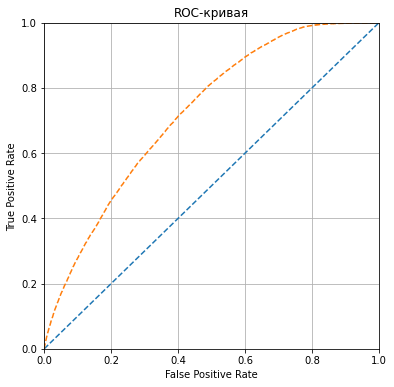


Значение метрики ROC-AUC на обучающей выборке = 0.8006:

Значение метрики ROC-AUC на тестовой выборке = 0.7224:

Значение метрики F1_macro на тестовой выборке = 0.5815


In [95]:
fpr, tpr, thresholds = roc_curve(target_test,
                                 cb_proba_one_test)


plt.figure(figsize = (6, 6))

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')

# ROC - кривая лучшей модели cb
plt.plot(fpr, tpr, linestyle='--')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()
roc_auc_test = roc_auc_score(target_test,
            cb_proba_one_test)
test_f1_score = f1_score(target_test, cb_predictions_test, average = 'macro')


print("\nЗначение метрики ROC-AUC на обучающей выборке = %0.4f:" % cb_search.best_score_)
print("\nЗначение метрики ROC-AUC на тестовой выборке = %0.4f:" % roc_auc_test)

print("\nЗначение метрики F1_macro на тестовой выборке = %0.4f" % test_f1_score)

###  Проверим модель на адекватность с помощью `DummyClassifier` на метрике `accuracy`

In [96]:
dummy_model = DummyClassifier() #strategy = 'most_frequent')
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)

acc_dummy = f1_score(target_test, dummy_predict, average = 'macro')
acc_cb = f1_score(target_test, cb_predictions_test, average = 'macro')

print("Метрика F1 macro фиктивной модели: %0.2f" % acc_dummy)
print("Метрика F1 macro модели CatBoostClassifier: %0.2f" % acc_cb)

Метрика F1 macro фиктивной модели: 0.45
Метрика F1 macro модели CatBoostClassifier: 0.58


- метрика `F1_macro` модели `CatBoostClassifier` на **13** пунктов лучше метрики фиктивной модели, которая всегда предсказывает наиболее частый класс
- выбранная модель **адекватна**

### Изучим метрики модели по результатам тестирования

#### Изучим матрицу ошибок и другие метрики

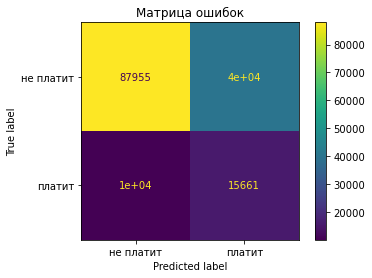

              precision    recall  f1-score   support

   не платит       0.90      0.69      0.78    128022
      платит       0.28      0.61      0.38     25707

    accuracy                           0.67    153729
   macro avg       0.59      0.65      0.58    153729
weighted avg       0.79      0.67      0.71    153729



In [97]:
cm = confusion_matrix(target_test, cb_predictions_test,
                      labels=cb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['не платит','платит']) 
disp.plot()
plt.title('Матрица ошибок')
plt.show()
print(classification_report(target_test,
                        cb_predictions_test, target_names = ['не платит','платит']))

In [98]:
cm

array([[87955, 40067],
       [10046, 15661]])

- модель правильно определила **15661** заявок, которые будут оплачены и неверно классифицировала как не оплаченные **10046** заявок
- модель правильно определила **87955** заявок, которые **не будут** оплачены, и неверно определила **40067** не оплаченных заявок, как оплаченые

- безошибочность прогнозирования `accuracy` на тестовой выборке составляет **67%**
- при этом точность предсказания `precision` не оплаченных заявок составляет **90%** при правильном предсказании **69%** значений данного класса выборки
- точность предсказания `precision` оплаченных заявок составляет **28%** при правильном предсказании **61%** значений данного класса выборки

- модель демонстрирует **плохую** точность предсказаний `precision` для положительного класса и **хорошую** - для нулевого, при этом модель демонстрирует удовлетворительный охват выборки при предсказании как положительного, так и нулевого класса

Модель может быть использована как **вспомогательная** при принятии решения о подключении консультантов к обработке заявки

### Выводы по результатам тестирования модели `CatBoostClassifier`

- модель `CatBoostClassifier` на **тестовой** выборке показала значение метрики `AUC_ROC` = **0.72**, что сопоставимо со значением, полученным в ходе кросс-валидации **(0.8)**, и объясняется не стратифицированным, а хронологическим выделением тестовой выборки, в тестовой выборке большой процент новых репетиторов, не имеющих истории взаимоотношений

- метрика `F1_macro` модели `CatBoostClassifier` на **13** пунктов превосходит метрику фиктивной модели, которая всегда предсказывает наиболее частый (нулевой) класс
- выбранная модель **адекватна**

- ROC-кривая плавная, стремится к левому верхнему углу, то есть к максимальному значению **True Positive Rate** при минимальном значении **False Positive Rate**, модель превосходит случайную модель, но значение метрики среднее

- модель `CatBoostClassifier` с гиперпараметрами:
    - `learning_rate`: **0.07173**,
    - `l2_leaf_reg`: **241**,
    - `min_data_in_leaf`: **347**, 
    - `iterations`: **379**,
    - `depth`: **8**,
    - `auto_class_weights`: **Balanced**

    может быть **рекомендована** как **вспомогательный** инструмент при прогнозировании целесообразности подключения консультантов для увеличения конверсии оплаты заявок на обучение

## Отчет

### Описание задачи

Сервис **Repetit.ru** работает с большим количеством заявок от клиентов с данными о предмете, желаемой стоимости, возрасте ученика, целью занятий и тд. К сожалению, 7 из 8 не доходят до оплаты, при этом обработка заявки консультантом увеличивает конверсию в оплату на 30%.
Проблема в том, что консультантов не хватает на все заявки и получается, что чем больше заявок — тем меньше конверсия из заявки в оплату и консультанты тратят время на бесперспективные заявки.

**Задача:**

- Разработать модель, которая по имеющейся информации о клиенте и заявке будет предсказывать вероятность оплаты заявки клиентом. Заказчик хочет понять, какие заявки будут оплачены, а какие нет, чтобы одни обрабатывать вручную консультантами, а другие нет.

**Метрика:**

- Оценка качества модели производится с использованием `precision` и `ROC-AUC`.

### Предварительная обработка данных

В основном датасете `data`, содержащем информацию о заявках:
- исправлен `индекс`
- **удалены** столбцы `additional_status_id`, `amount_to_pay`, `client_id`, `estimated_fee`, `first_lesson_date`, `payment_date`, `start_date`, `comments` `creator_id`, `prefered_teacher_id` с данными, ведущими к утечке целевого признака, либо не нужными для моделирования
-  **удалены** строки с ошибочными данными
- формат столбца с датами **приведены** к `datetime`
- значения возраста **приведены** к диапазону от 16 до 90 лет
- числовые данные **приведены** к `целочисленному` типу
- **cоздан** столбец с **целевым** признаком `payment`, в котором 1 означает, что оплата произведена, и **удален** столбец `status_id`, из которого был сформирован целевой признак

- из датасета `suitable_teachers` **удалены** столбец `contact_result` и полные дубликаты

- удалены полные дубликаты из датасета `prefered_teachers`

- в датасете `teachers_info` оставлены только столбцы с рейтингами `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `star_rating`

### Конструирование признаков

- создан массив признаков `features_train` и вектор целевого признака `target_train`, в котором:
    - **удалены дубликаты заявок**
    - в случае, если хотя бы один из дубликатов был **оплачен**, первичной заявке присваивается статус `оплачена` (**целевой признак** = 1)
    - созданы новые признаки длины полей `purpose_len` и `add_info_len`, содержащие длину признаков `purpose` и `add_info`
    - создан новый признак цели занятий `purpose_code`, содержащий цель занятий
    - созданы новые признаки `года`, `месяца`, `дня`, `дня недели` и `часа` создания заявки
    - созданы новые признаки `suitable_teachers` (количество подходящих к заявке учителей), `enable_assign` (средняя возможность назначиться), `enable_auto_assign` (средняя возможность автоматического назначения)
    - созданы новые признаки `rating`, `rating_for_admin`, `rating_for_users`, `rating_id`, `source_id`, `star_rating`, содержащие **средние** рейтинги учителей, подходящих к заявке
    - из массива признаков удалены столбцы `order_date`, `client_id`, `creator_id`, `id`, `original_order_id`, `working_teacher_id` и `payment`, содержащие **утечку целевого признака**

### Исследовательский анализ данных

- имеется **сильный** дисбаланс классов: в векторе **целевого признака**  22% значений единичного класса (оплачено) и 78% нулевых значений (не оплачено), что учтено при обучении моделей (применена балансировка)

- **Анализ распределения категориальных признаков в зависимости от целевого признака** показывает практически идентичное распределение значений категориальных признаков в оплаченных и не оплаченных заявках, в поправкой на дисбаланс классов, за исключением признаков `no_teachers_available` - в оплаченных заявках удельный вес нулевого значения признака (есть доступные учителя) значительно превышает удельный вес признака в неоплаченных заявках, а также `planned_lesson_number` - в оплаченных заявках доля количества уроков = 10 значительно больше доли этого количества уроков в неоплаченных заявках

- **Анализ распределения количественных признаков в зависимости от значения целевого признака показывает следующее:**

    - имеются многочисленные выбросы, при использовании линейных моделей нужно будет использовать **RobustScaler**
    
    - в распределении признаков `teacher_age_from`, `teacher_age_to`, `teacher_experience_from`, `teacher_experience_to` **отсутствуют** различия между оплаченными и неоплаченными заявками
    - наиболее заметным различия между оплаченными и неоплаченными заявками в распределениях следующих признаков:
        - `suitable_teachers` - 50% не оплаченных заявок имеют значение этого рейтинга менее 3, в то же время как 75% оплаченных имеет значение рейтинга более 4
        - `star_rating` - половина не оплаченных заявок имеет значение этого рейтинга менее 0.7, в то же время более 75% оплаченных заявок имеет значение этого рейтинга более 1
       - `rating_id` - половина не оплаченных заявок имеет значение этого рейтинга менее 1, при этом 75% оплаченных заявок имеет значение рейтинга более 2
       - `rating for users`- половина не оплаченных заявок имеет значение этого рейтинга менее 2, при этом 75% оплаченных заявок имеет значение рейтинга более 10       

       
- **Можно нарисовать следующий портрет потенциально оплаченной заявки**:
    - `suitable_teachers` более 3
    - `stars_rating` более 1
    - `rating_id` более 1
    - `rating for users` более 2

### Корреляция и мультиколлинеарность

- наблюдается **умеренная корреляция** целевого признака со следующими признаками: `star_rating`, `no_teachers_available`, `lesson_place_new`, `add_info_len`, `purpose_code`,
- наблюдается **слабая корреляция** целевого признака со следующими признаками: `rating_id`, `enable_auto_assign`, `lessons_per_week`, `pupil_category_new_id`, `suitable_teachers`, `lesson_price`, `enable_assign`,   `home_metro_id`, `planned_lesson_number`, `source_id`,  `teacher_sex`,  `teacher_age_from`
- с остальными признаками корреляция **отсутствует**
- наблюдается **сильная мультиколлинеарность** между признаками `rating_for_admin` и `rating_for_users`, что необходимо учесть при обучении в случае использования линейных моделей

### Обучение моделей и сравнение метрик

**Были обучены и проверены методом кросс-валидации две модели: `RandomForestClassifier` и `CatBoostClassifier`**:
- модель `RandomForestClassifier` показала значение метрики `AUC-ROC` = **0.78**, что хуже, чем значение метрики **AUC-ROC = 0.8** модели `CatBoostClassifier`
- модель `CatBoostClassifier` была отобрана для последующего тестирования

### Анализ важности признаков

- анализ важности признаков для модели ` CatBoostClassifier` демонстрирует, что **наиболее значимый** признак - это синтезированный признак `suitable_teachers`



### Тестирование модели `CatBoostClassifier`

- модель `CatBoostClassifier` на **тестовой** выборке показала значение метрики `AUC-ROC` = **0.72**

- метрика `F1_macro` модели `CatBoostClassifier` на **13** пунктов превосходит метрику фиктивной модели, которая всегда предсказывает наиболее частый (нулевой) класс
- выбранная модель **адекватна**

- модель правильно определила **15661** заявок, которые будут оплачены и неверно классифицировала как не оплаченные **10046** заявок
- модель правильно определила **87955** заявок, которые **не будут** оплачены, и неверно определила **40067** не оплаченных заявок, как оплаченые

- безошибочность прогнозирования `accuracy` на тестовой выборке составляет **67%**
- при этом точность предсказания `precision` не оплаченных заявок составляет **90%** при правильном предсказании **69%** значений данного класса выборки
- точность предсказания `precision` оплаченных заявок составляет **28%** при правильном предсказании **61%** значений данного класса выборки

- модель демонстрирует **плохую** точность предсказаний `precision` для положительного класса и **хорошую** - для нулевого, при этом модель демонстрирует удовлетворительный охват выборки при предсказании как положительного, так и нулевого класса

Модель может быть использована как **вспомогательная** при принятии решения о подключении консультантов к обработке заявки

### Заключение

- модель `CatBoostClassifier` с гиперпараметрами:
    - `learning_rate`: **0.07173**,
    - `l2_leaf_reg`: **241**,
    - `min_data_in_leaf`: **347**, 
    - `iterations`: **379**,
    - `depth`: **8**,
    - `auto_class_weights`: **Balanced**

    может быть **рекомендована** как **вспомогательный** инструмент при прогнозировании целесообразности подключения консультантов для увеличения конверсии оплаты заявок на обучение

### Пути улучшения прогнозирования

- предлагается внимательно изучить отказные заявки, когда ученик отказывается от занятий **после** получения контактов учителей
- предлагается добавить такие заявки в положительный целевой признак и изучить изменение точности прогноза

## Рекомендации

- заказчику при поступлении новых заявок следует в первую очередь обращать внимание на заявки с высоким значением количества учителей, подходящих заявке `suitable_teachers`

**Также заказчику предлагается рассмотреть изменение способа взимания платы, например перейти на абонементную плату  за нахождение учителя на сайте, вместо взимания суммы первого занятия с коэффициентом** так как действующая система оплаты стимулирует учителей договариваться напрямую